In [70]:
import os
import re
import numpy as np
import scanpy as sc
import pandas as pd
import anndata
import infercnvpy as cnv
import seaborn as sns
import matplotlib.pyplot as plt
import scrublet as scr
import seaborn as sns
import scipy
import harmonypy as hm
from statannotations.Annotator import Annotator
import warnings
import gseapy as gp 
from matplotlib_venn import venn2,venn3


In [72]:
def plot_freq(data_object, sample, cell_type, density=True,sort=False,
             row=["NC","Xray","BNCT"],
             column = ['Tumor','Tumor_0', 'Tumor_1','tumor_2', 'Tumor_3', 'Fibroblast','Neutrophil', 'Macro', 'NK', 'DC', 'T' ], cmap='tab20_r',file_path=False):
    sc.settings.set_figure_params(dpi=80)
    data = data_object.obs[[sample,cell_type]]
    data[cell_type] = np.array(data[cell_type])
    if density:
        b=data.groupby([sample]).value_counts([cell_type],normalize=True).reset_index().pivot(index=sample, 
                columns=cell_type)
    else:
        b=data.groupby([sample]).value_counts([cell_type]).reset_index().pivot(index=sample, 
                columns=cell_type)
    b.index.name = None
    b.columns.names = [None,None]
    b.columns = b.columns.droplevel(0)
    plt.style.use("seaborn-pastel")
    b = b.loc[row,column]
    if sort:
        b=b.sort_values(b.columns[-1])
    b.plot(kind='barh',stacked=True,figsize=(3.2,4),grid=False,table=False,legend=True, cmap=cmap) #tab20_r
    plt.legend(bbox_to_anchor=(1.05,0), loc=3, borderaxespad=0)
    if file_path:
        plt.savefig(file_path,  bbox_inches='tight')
    plt.show()
                 

In [103]:
s_genes=["MCM5","PCNA","TYMS","FEN1","MCM2","MCM4","RRM1","UNG","GINS2","MCM6","CDCA7","DTL","PRIM1","UHRF1","MLF1IP","HELLS","RFC2","RPA2",
"NASP","RAD51AP1","GMNN","WDR76","SLBP","CCNE2","UBR7","POLD3","MSH2","ATAD2","RAD51","RRM2","CDC45","CDC6","EXO1","TIPIN","DSCC1",
"BLM","CASP8AP2","USP1","CLSPN","POLA1","CHAF1B","BRIP1","E2F8"]

g2m_genes=["HMGB2","CDK1","NUSAP1","UBE2C","BIRC5","TPX2","TOP2A","NDC80","CKS2","NUF2","CKS1B","MKI67","TMPO","CENPF","TACC3","FAM64A","SMC4",
"CCNB2","CKAP2L","CKAP2","AURKB","BUB1","KIF11","ANP32E","TUBB4B","GTSE1","KIF20B","HJURP","CDCA3","HN1","CDC20","TTK","CDC25C",
"KIF2C","RANGAP1","NCAPD2","DLGAP5","CDCA2","CDCA8","ECT2","KIF23","HMMR","AURKA","PSRC1","ANLN","LBR","CKAP5","CENPE","CTCF","NEK2",
"G2E3","GAS2L3","CBX5","CENPA"]

s_genes = [x[0]+x[1:].lower() for x in s_genes]
g2m_genes = [x[0]+x[1:].lower() for x in g2m_genes]


# B16

## Import files


In [2]:
adata = sc.read_h5ad('/home/zhaoyp/BNCT/Data_final/b16.h5ad')


/home/zhaoyp/miniconda3/envs/py38/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


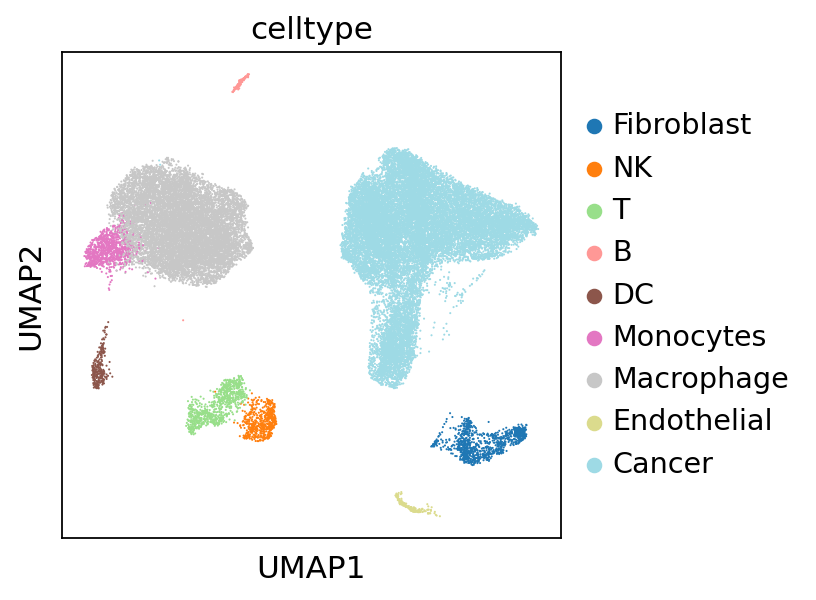

In [3]:
# 4b 
sc.settings.set_figure_params(dpi=80)
sc.pl.umap(adata, color=['celltype'], palette='tab20')


/home/zhaoyp/TEMPDIR/ipykernel_205975/3558351337.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[cell_type] = np.array(data[cell_type])
/home/zhaoyp/TEMPDIR/ipykernel_205975/3558351337.py:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-pastel")


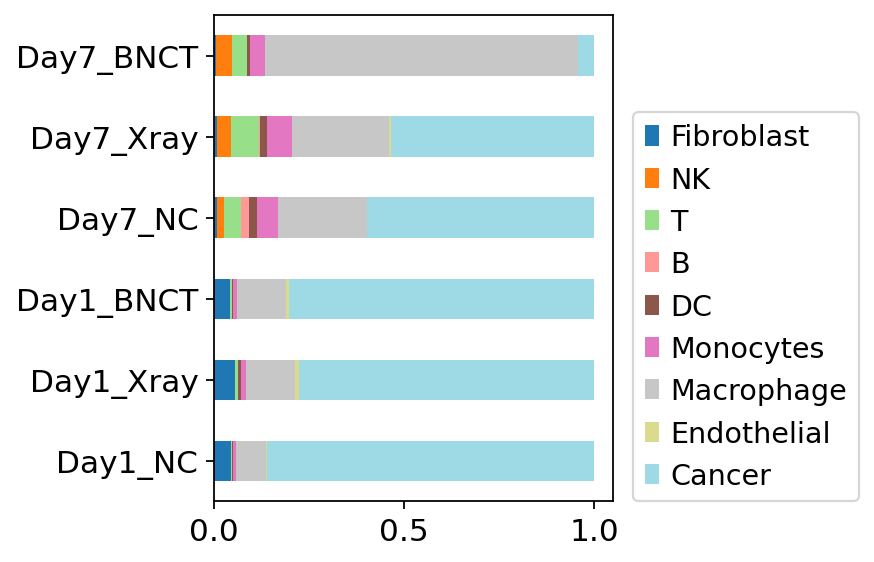

In [29]:
plot_freq(adata, "sample", "celltype", density=True, column=list(adata.obs['celltype'].cat.categories),row=['Day1_NC','Day1_Xray','Day1_BNCT','Day7_NC','Day7_Xray','Day7_BNCT'],  cmap='tab20')


## Tumor

In [4]:
Tumor = sc.read_h5ad('/home/zhaoyp/BNCT/Data_final/tumor.h5ad')


/home/zhaoyp/miniconda3/envs/py38/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


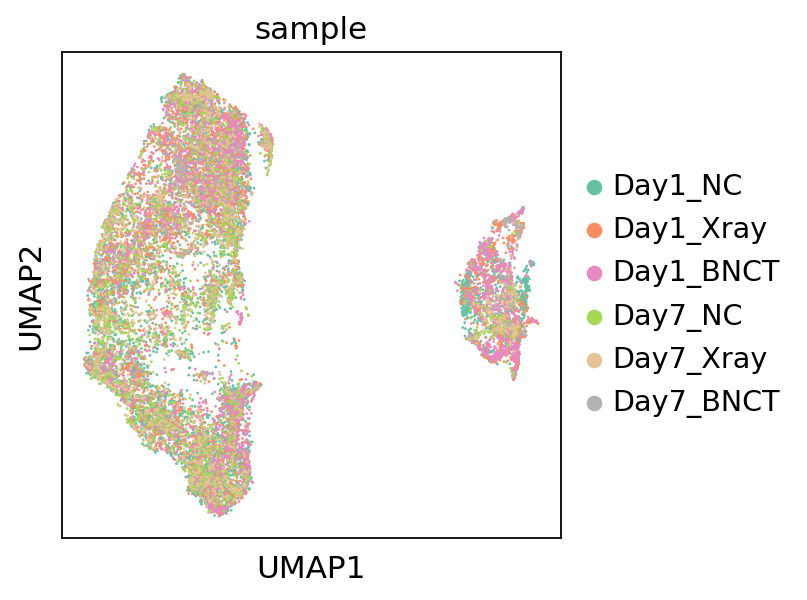

/home/zhaoyp/miniconda3/envs/py38/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


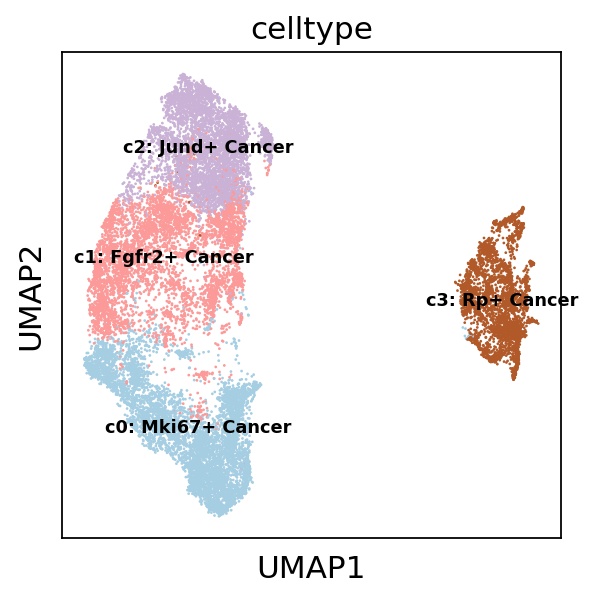

In [11]:
sc.pl.umap(Tumor, color='sample', palette='Set2')

sc.pl.umap(Tumor, color='celltype', palette='Paired', legend_loc='on data',legend_fontsize=8)


/home/zhaoyp/TEMPDIR/ipykernel_205975/3558351337.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[cell_type] = np.array(data[cell_type])
/home/zhaoyp/TEMPDIR/ipykernel_205975/3558351337.py:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-pastel")


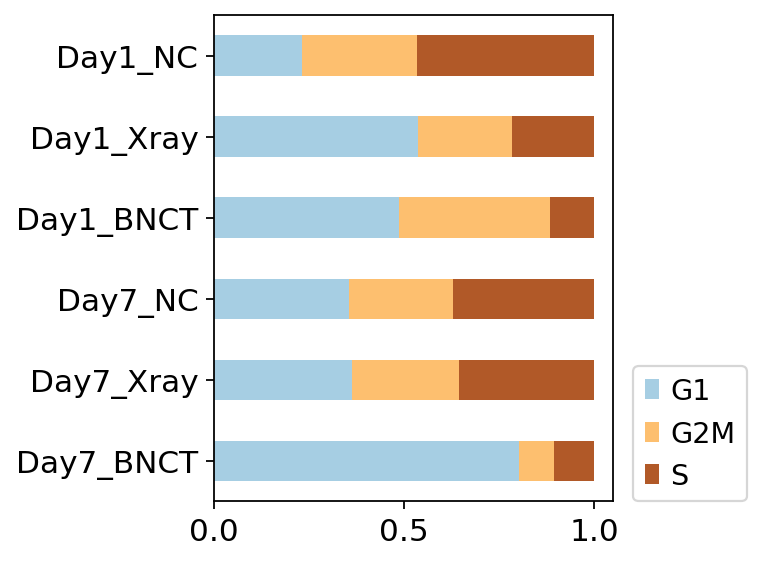

In [12]:
# cell cycle
plot_freq(Tumor, 'sample', 'phase', density=True, sort=False,
          row = ['Day1_NC','Day1_Xray','Day1_BNCT','Day7_NC','Day7_Xray','Day7_BNCT'][::-1] , column = sorted(list(set(Tumor.obs['phase']))), cmap='Paired')


In [18]:
# cell cluster ratio
ratio_df = Tumor.obs[['sample','celltype']].groupby(['sample']).value_counts(['celltype'],normalize=True).reset_index().pivot(index='sample', columns='celltype')
ratio_df.columns = ratio_df.columns.droplevel(0)
ratio_df.index.names = [None]
ratio_df['Time'] = ['Day0']*3 + ['Day7']*3
ratio_df['Condition'] = ['NC', 'Xray', 'BNCT'] * 2
ratio_df = ratio_df.pivot_table(index='Time',columns='Condition')
ratio_df.index.names = [None]
ratio_df = pd.DataFrame(ratio_df.loc['Day7', :] - ratio_df.loc['Day0', :]).reset_index()
ratio_df.columns = ['celltype','Condition','value']

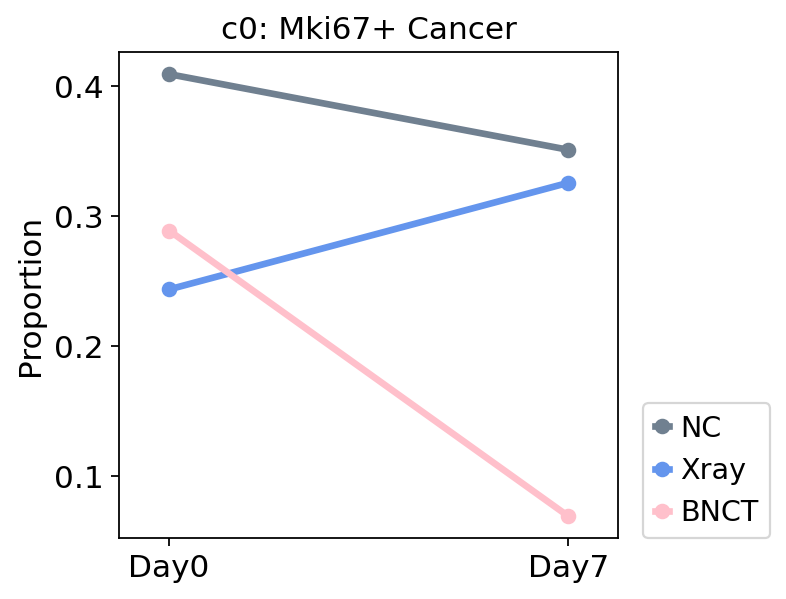

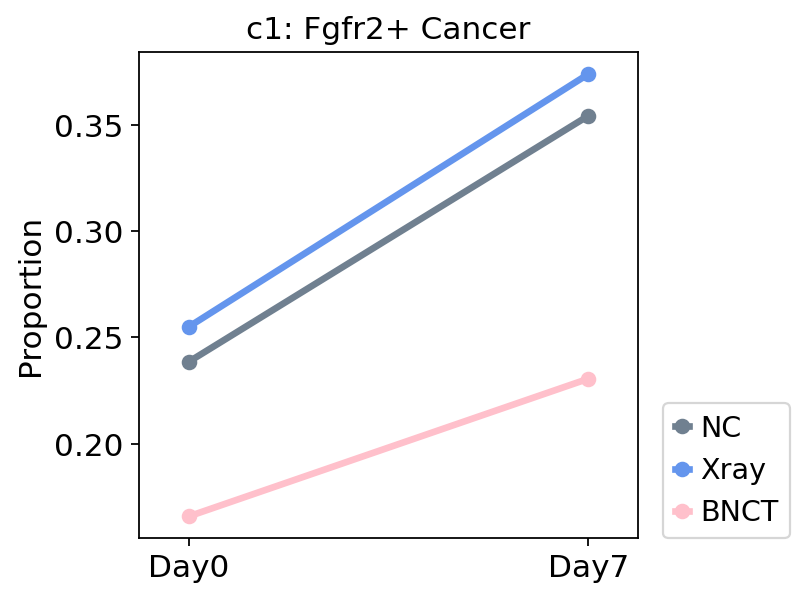

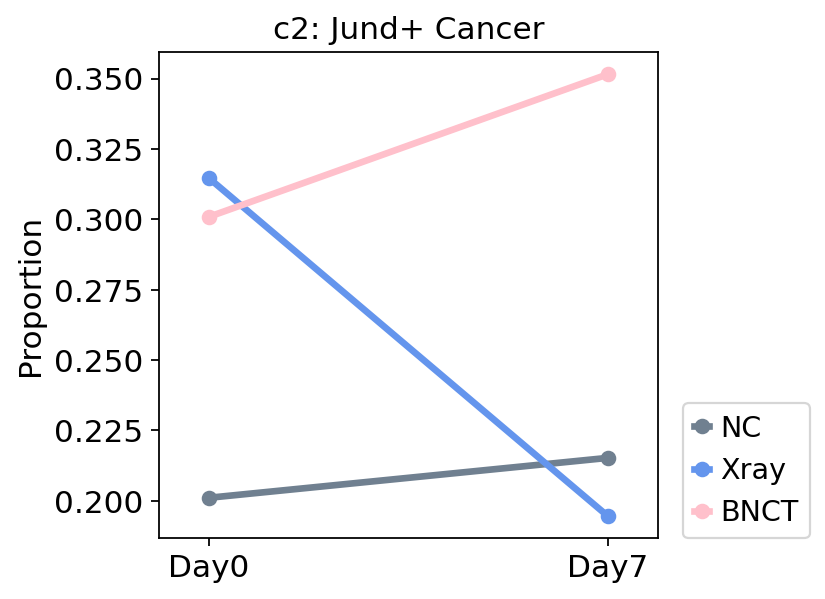

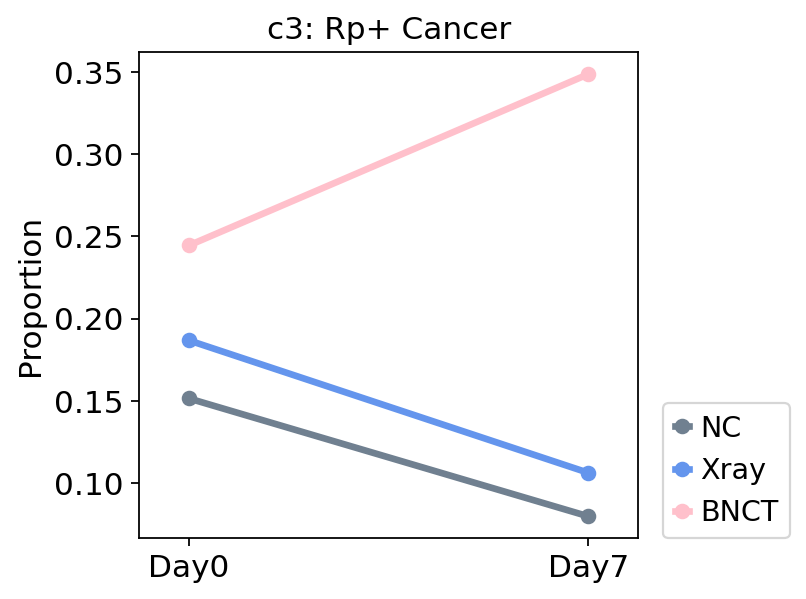

In [21]:
for x in ratio_df['celltype'].unique(): 
    ratio_df = Tumor.obs.groupby(['sample']).value_counts(['celltype'],normalize=True).reset_index().pivot(index='sample', columns='celltype')
    ratio_df.index.names = [None]
    ratio_df.columns = ratio_df.columns.droplevel(0)
    ratio_df = pd.DataFrame(ratio_df[x])
    ratio_df['Time'] = ['Day0']*3 + ['Day7']*3
    ratio_df['Condition'] = ['NC', 'Xray', 'BNCT'] * 2
    ratio_df = ratio_df.pivot_table(index='Time',columns='Condition')
    ratio_df.columns = ratio_df.columns.droplevel(0)
    ratio_df.index.names = [None]
    
    plt.plot([0.1,0.9], ratio_df['NC'], marker='o', linestyle='-', color='slategrey', linewidth=3, label='NC')
    plt.plot([0.1,0.9], ratio_df['Xray'], marker='o', linestyle='-', color='cornflowerblue', linewidth=3, label='Xray')
    plt.plot([0.1,0.9], ratio_df['BNCT'], marker='o', linestyle='-', color='pink', linewidth=3, label='BNCT')
    plt.title(x)
    plt.xticks([0.1,0.9],ratio_df.index, rotation=0)
    plt.legend()
    plt.ylabel('Proportion')
    plt.xlim([0,1])
    plt.grid(False)
    plt.legend(bbox_to_anchor=(1.05,0), loc=3, borderaxespad=0)
    plt.show()


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

c2: Jund+ Cancer vs. c3: Rp+ Cancer: Mann-Whitney-Wilcoxon test two-sided, P_val:0.000e+00 U_stat=1.606e+07
c1: Fgfr2+ Cancer vs. c3: Rp+ Cancer: Mann-Whitney-Wilcoxon test two-sided, P_val:0.000e+00 U_stat=1.638e+07
c0: Mki67+ Cancer vs. c3: Rp+ Cancer: Mann-Whitney-Wilcoxon test two-sided, P_val:0.000e+00 U_stat=2.135e+07


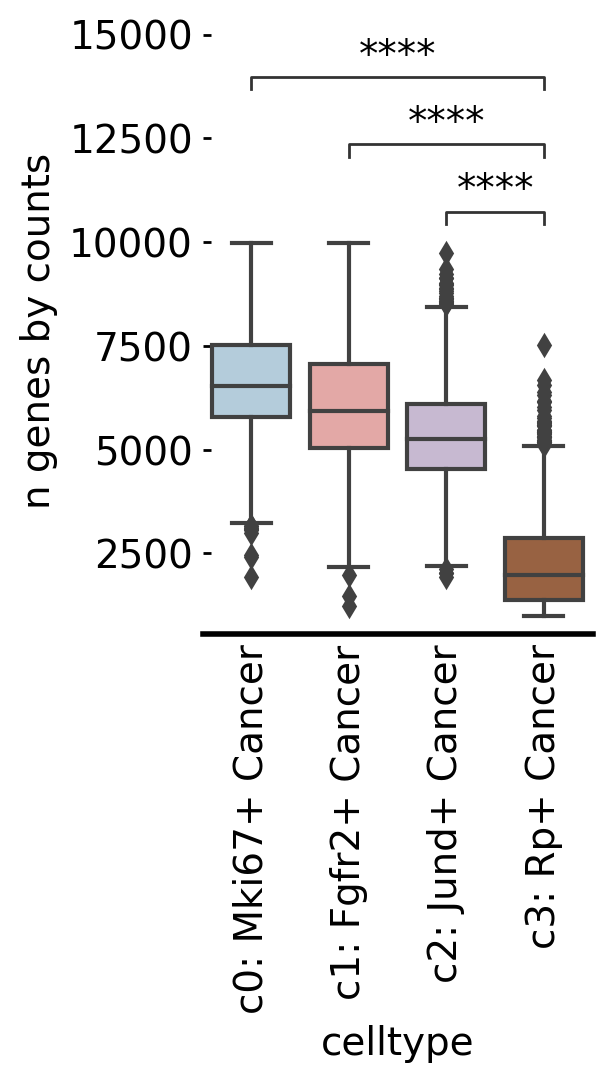

In [24]:
df = Tumor.obs[["celltype","n_genes"]]
x = "celltype"
y = "n_genes"
order=['c0: Mki67+ Cancer','c1: Fgfr2+ Cancer','c2: Jund+ Cancer','c3: Rp+ Cancer']

fig,ax = plt.subplots( figsize=(2.5,4),dpi=100,facecolor="w") 
ax = sns.boxplot(data=df, x=x, y=y, order=order,ax=ax, palette=['#AECDE1', '#ED9F9C', '#C8B5D5', '#A65E34'])
plt.grid()
pairs=[('c0: Mki67+ Cancer', 'c3: Rp+ Cancer'), ('c1: Fgfr2+ Cancer', 'c3: Rp+ Cancer'), ('c2: Jund+ Cancer', 'c3: Rp+ Cancer')]

annotator = Annotator(ax, pairs, data=df, x=x, y=y, order=order)
annotator.configure(test='Mann-Whitney', text_format='star', line_height=0.03,line_width=1) #Mann-Whitney
annotator.apply_and_annotate() 

ax.tick_params(which='major',direction='in',length=3,width=1.,labelsize=14,bottom=False)
for spine in ["top","left","right"]:
    ax.spines[spine].set_visible(False)
ax.spines['bottom'].set_linewidth(2) 
ax.set_axisbelow(True)
ax.set_xticks([0,1,2,3],order,rotation=90)
ax.set_ylabel('n genes by counts')
plt.grid(False)
plt.show()


{'heatmap_ax': <AxesSubplot: >,
 'groupby_ax': <AxesSubplot: xlabel='celltype'>,
 'dendrogram_ax': <AxesSubplot: >,
 'gene_groups_ax': <AxesSubplot: >}

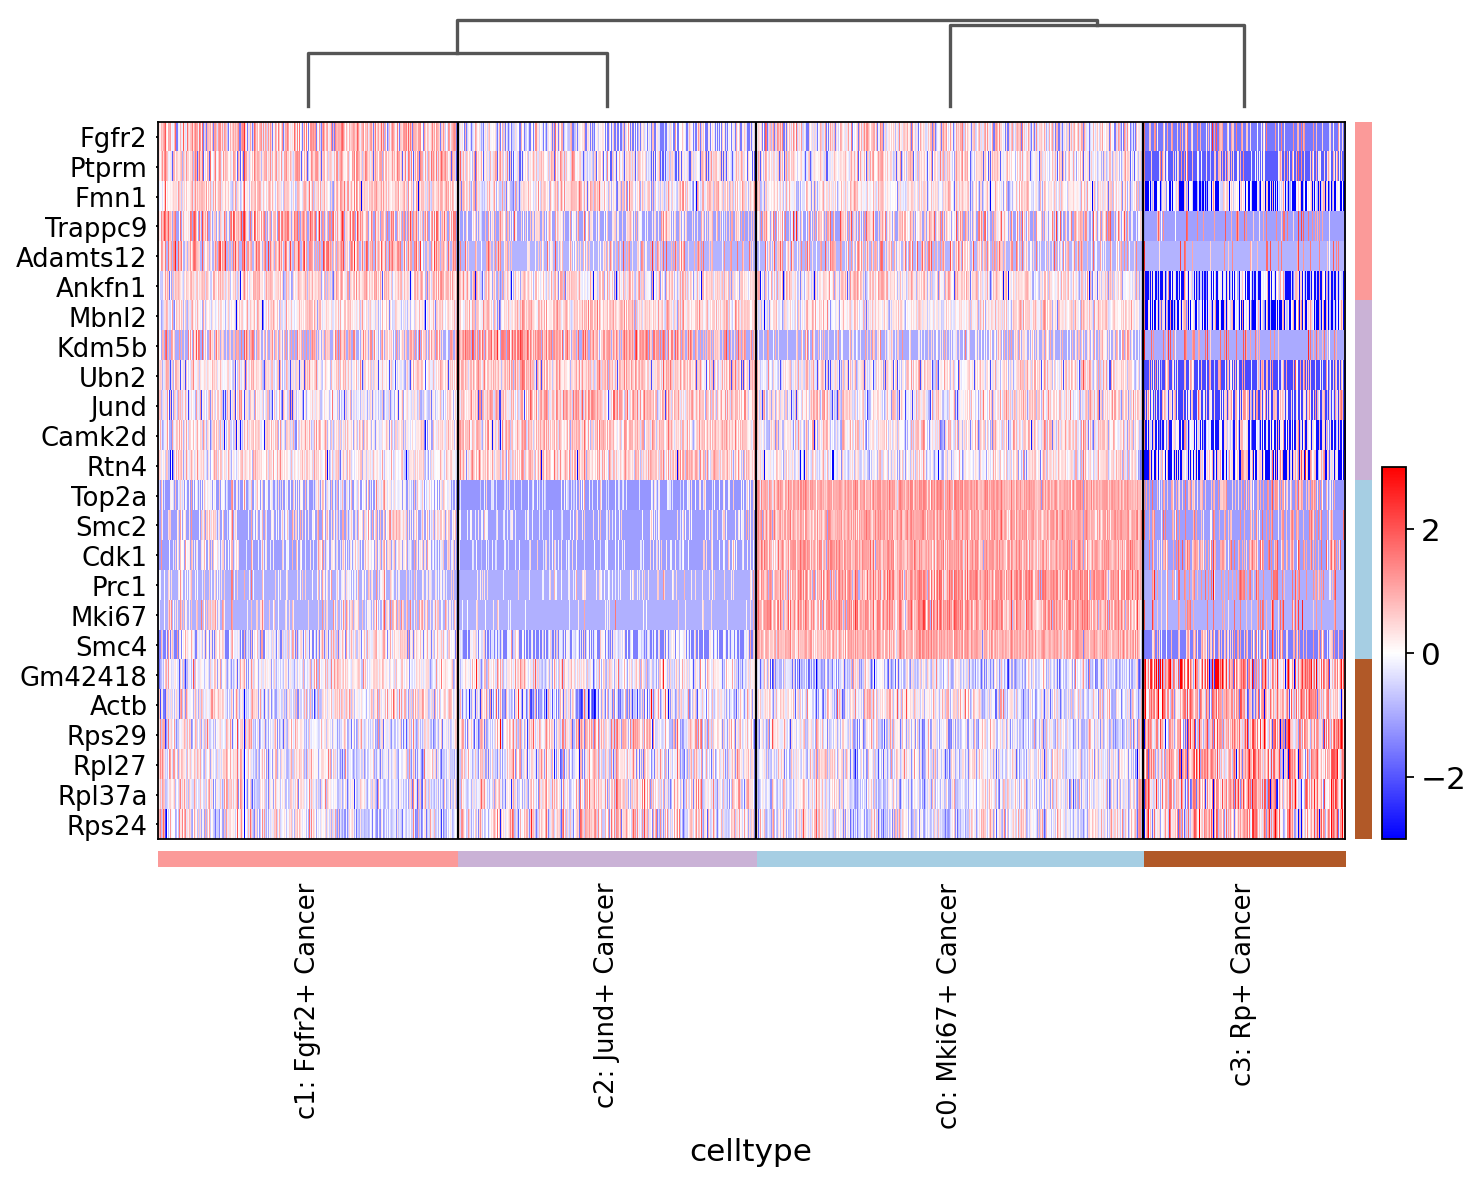

In [34]:
sc.tl.rank_genes_groups(Tumor, groupby='celltype')
Tumor.layers["scaled"] = sc.pp.scale(Tumor, copy=True).X

sc.pl.rank_genes_groups_heatmap(
    Tumor, n_genes=6, use_raw=False, swap_axes=True, vmin=-3, vmax=3, cmap="bwr", layer="scaled", figsize=(10, 7), show=False
)


{'mainplot_ax': <AxesSubplot: >,
 'color_legend_ax': <AxesSubplot: title={'center': 'Mean expression\nin group'}>}

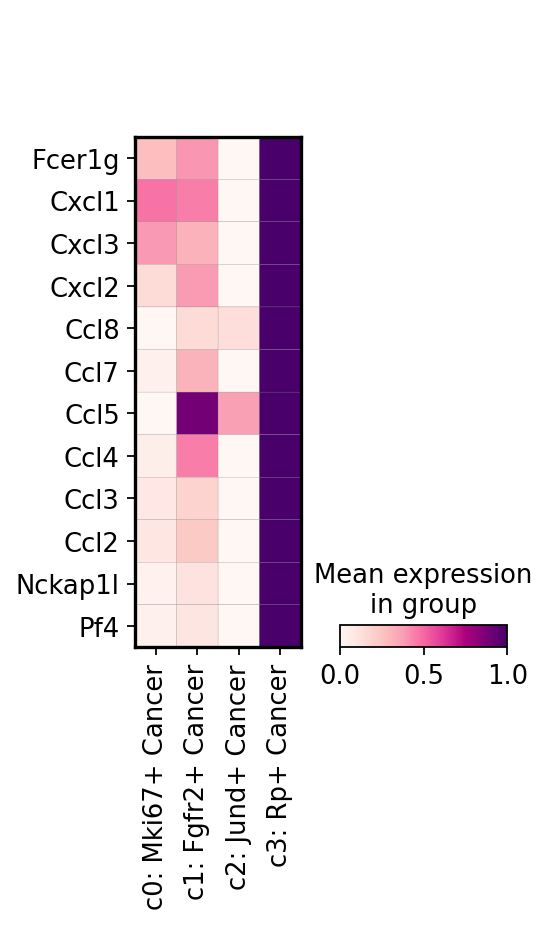

In [33]:
G = ['FCER1G', 'CXCL1', 'CXCL3', 'CXCL2', 'CCL8', 'CCL7', 'CCL5', 'CCL4', 'CCL3', 'CCL2', 'NCKAP1L',  'PF4']

sc.pl.matrixplot(Tumor, [x[0]+x[1:].lower() for x in G], groupby='celltype',  cmap='RdPu', standard_scale='var', swap_axes = True, show=False)


Day1_NC vs. Day1_Xray: Mann-Whitney-Wilcoxon test two-sided, P_val:6.765e-152 U_stat=1.046e+07
Day1_Xray vs. Day1_BNCT: Mann-Whitney-Wilcoxon test two-sided, P_val:6.041e-09 U_stat=8.476e+06
Day1_NC vs. Day1_BNCT: Mann-Whitney-Wilcoxon test two-sided, P_val:6.948e-216 U_stat=8.804e+06


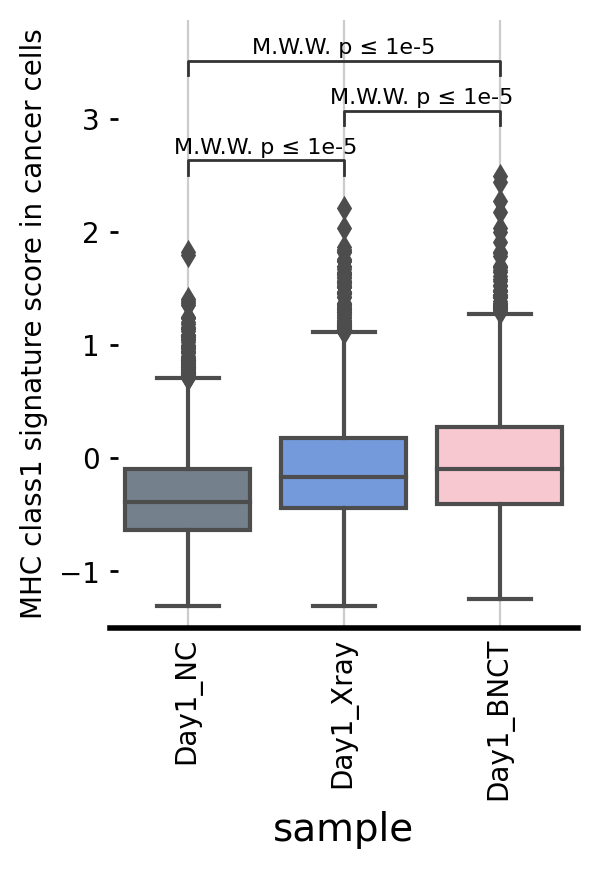

Day7_NC vs. Day7_Xray: Mann-Whitney-Wilcoxon test two-sided, P_val:1.925e-80 U_stat=1.358e+06
Day7_Xray vs. Day7_BNCT: Mann-Whitney-Wilcoxon test two-sided, P_val:6.034e-59 U_stat=1.393e+05
Day7_NC vs. Day7_BNCT: Mann-Whitney-Wilcoxon test two-sided, P_val:1.737e-122 U_stat=8.820e+04


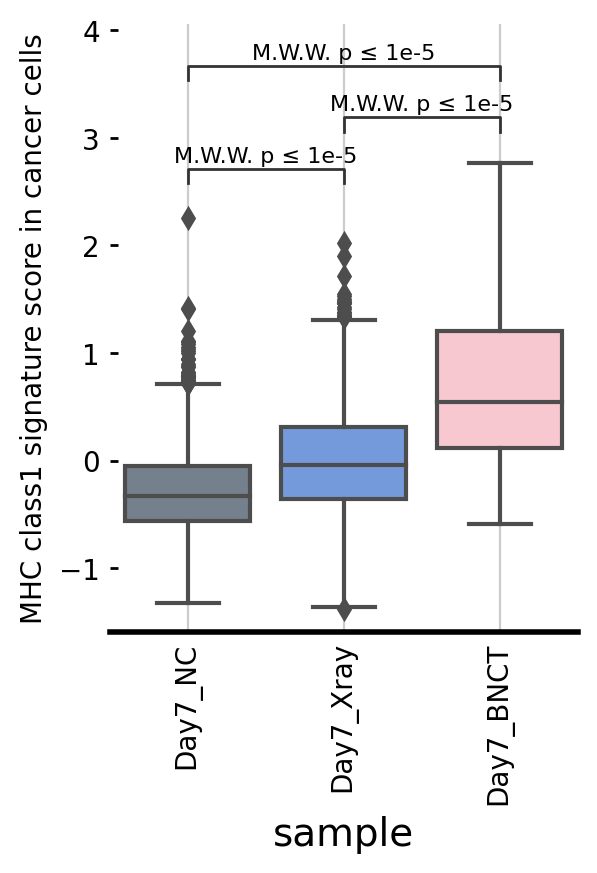

In [35]:
Class1 = ['H2-K1', 'H2-Ke6',  'H2-D1', 'H2-Q4',  'H2-T23', 'H2-T22']
sc.tl.score_genes(Tumor, Class1, ctrl_size=500, gene_pool=None, n_bins=25, score_name='score', random_state=0, copy=False, use_raw=None)

df = Tumor.obs[["sample","score"]]
x = "sample"
y = "score"
order=['Day1_NC','Day1_Xray','Day1_BNCT']
fig,ax = plt.subplots(figsize=(3,4),dpi=100,facecolor="w")
ax = sns.boxplot(data=df, x=x, y=y, order=order,ax=ax,palette=['slategrey', 'cornflowerblue', 'pink'])
plt.grid()
pairs=[("Day1_Xray", "Day1_NC"), ("Day1_BNCT", "Day1_NC"),  ("Day1_BNCT", "Day1_Xray")]
annotator = Annotator(ax, pairs, data=df, x=x, y=y, order=order)
annotator.configure(test='Mann-Whitney', text_format='simple', line_height=0.03,line_width=1,fontsize=8) #Mann-Whitney
annotator.apply_and_annotate()
ax.tick_params(which='major',direction='in',length=3,width=1.,labelsize=10,bottom=False)
ax.set_xticks([0,1,2],['Day1_NC','Day1_Xray','Day1_BNCT'],rotation=90)
for spine in ["top","left","right"]:
    ax.spines[spine].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.set_axisbelow(True)
ax.set_ylabel('MHC class1 signature score in cancer cells', size=10)
plt.show() 


df = Tumor.obs[["sample","score"]]
x = "sample"
y = "score"
order=['Day7_NC','Day7_Xray','Day7_BNCT']
fig,ax = plt.subplots(figsize=(3,4),dpi=100,facecolor="w")
ax = sns.boxplot(data=df, x=x, y=y, order=order,ax=ax,palette=['slategrey', 'cornflowerblue', 'pink'])
plt.grid()
pairs=[("Day7_Xray", "Day7_NC"), ("Day7_BNCT", "Day7_NC"),  ("Day7_BNCT", "Day7_Xray")]
annotator = Annotator(ax, pairs, data=df, x=x, y=y, order=order)
annotator.configure(test='Mann-Whitney', text_format='simple', line_height=0.03,line_width=1,fontsize=8) #Mann-Whitney
annotator.apply_and_annotate()
ax.tick_params(which='major',direction='in',length=3,width=1.,labelsize=10,bottom=False)
ax.set_xticks([0,1,2],['Day7_NC','Day7_Xray','Day7_BNCT'],rotation=90)
for spine in ["top","left","right"]:
    ax.spines[spine].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.set_axisbelow(True) 
ax.set_ylabel('MHC class1 signature score in cancer cells', size=10)
plt.show() 


## Immune


/home/zhaoyp/TEMPDIR/ipykernel_205975/829673526.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[cell_type] = np.array(data[cell_type])
/home/zhaoyp/TEMPDIR/ipykernel_205975/829673526.py:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-pastel")


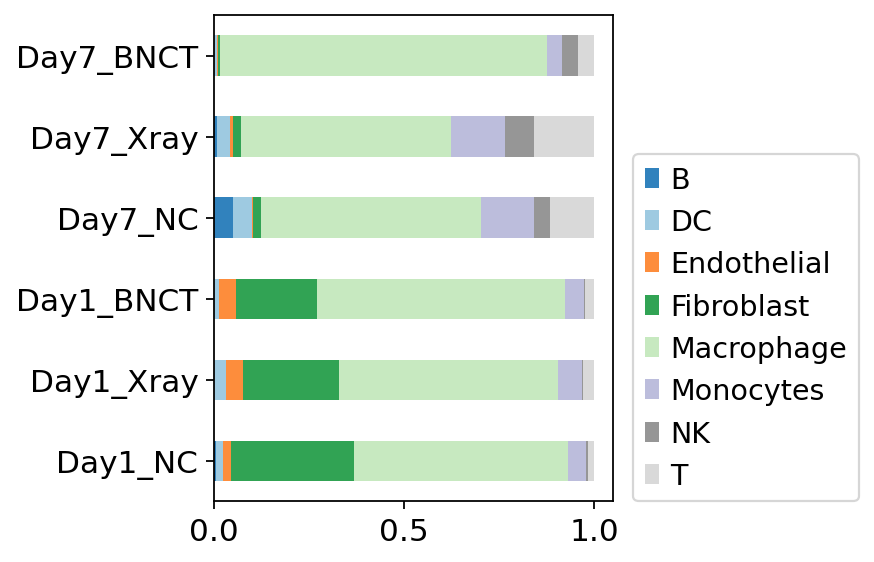

In [56]:
normal = adata[adata.obs['celltype'].isin(['B','T','Fibroblast','NK','DC','Monocytes','Macrophage','Endothelial'])]
plot_freq(normal, 'sample', 'celltype', density=True, sort=False,
          row = ['Day1_NC','Day1_Xray','Day1_BNCT','Day7_NC','Day7_Xray','Day7_BNCT' ], column = sorted(list(set(normal.obs['celltype']))), cmap='tab20c' )


### DC

In [37]:
dc = adata[adata.obs['celltype'].isin(['DC'])] 


In [41]:
sig=['Cd68','Cd1d1','Mfsd6','Ifi30','Tapbpl','H2-Eb2','Ctse','Mpeg1','H2-Aa','H2-Eb1','H2-Q9','H2-Q8','H2-T24','2410137M14Rik','Tapbp','H2-Ob','H2-Oa','Raet1e','Mill2','Mill1','Raet1d','H60c','H60b','Tap2','H2-Ab1','Cd74','Raet1a','Raet1c','H2-M3','H2-DMb2','H2-DMb1','Unc93b1','Marchf1','Marchf8','Ulbp1','Raet1b','Hfe','Tap1','H2-T7','Clec4b2','H2-D1','H2-T5','H2-Q7','H2-Q6','H2-Q4','H2-Q2','H2-Q10','H2-K1','H2-Q1','Ide','H2-T23','B2m','Fgl2','H2-M10.3','H2-T3','H2-T22','H2-M2','H2-M1','H2-L','H2-M5','H2-M10.2','H2-M10.6','H2-M9','H2-M10.4','H2-M10.5','H2-M10.1','H2-M11','H2-DMa','Lgmn','Ctss','Pikfyve','Mr1','Fcgr3','Fcgr1','H2-T9','Arl8b','Psme1','Psme2','Fcer1g','Wdfy4','Ap3d1','Fcgr2b','Ap3b1','Kdm5d','Treml4','Pdia3','Psmb8','Rab33a','Pycard','Rftn1','Traf6','Slc11a1','Calr','Fcgr4','Fcer2a','Nod1','Rab3c','Psmb9','Rab5b','Bag6','Thbs1','Trem2','Ctsl','Rab32','Rab6a','Ythdf1','Ccl21a','Rab4a','Ccl19','Rab35','Icam1','Was','Washc1','Ccr7','Psap','Rab34','Rab8b','Rab3b','Rab10','Atg5','Trex1','Relb','Flt3','Nod2','Rab27a','Ext1','Gba1','Ifng']
sc.tl.score_genes(dc, sig)


/home/zhaoyp/miniconda3/envs/py38/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:175: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[score_name] = pd.Series(


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Day1_NC vs. Day1_Xray: Mann-Whitney-Wilcoxon test two-sided, P_val:5.284e-03 U_stat=2.090e+02
Day1_Xray vs. Day1_BNCT: Mann-Whitney-Wilcoxon test two-sided, P_val:1.043e-01 U_stat=3.000e+02
Day1_NC vs. Day1_BNCT: Mann-Whitney-Wilcoxon test two-sided, P_val:3.403e-01 U_stat=9.500e+01


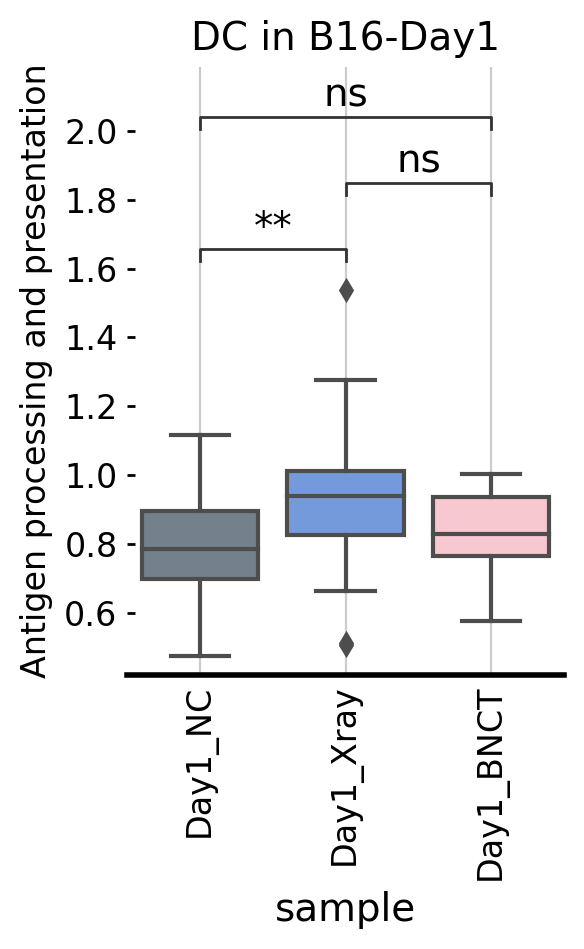

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Day7_NC vs. Day7_Xray: Mann-Whitney-Wilcoxon test two-sided, P_val:3.757e-02 U_stat=1.689e+03
Day7_Xray vs. Day7_BNCT: Mann-Whitney-Wilcoxon test two-sided, P_val:2.136e-04 U_stat=1.148e+03
Day7_NC vs. Day7_BNCT: Mann-Whitney-Wilcoxon test two-sided, P_val:2.006e-09 U_stat=1.251e+03


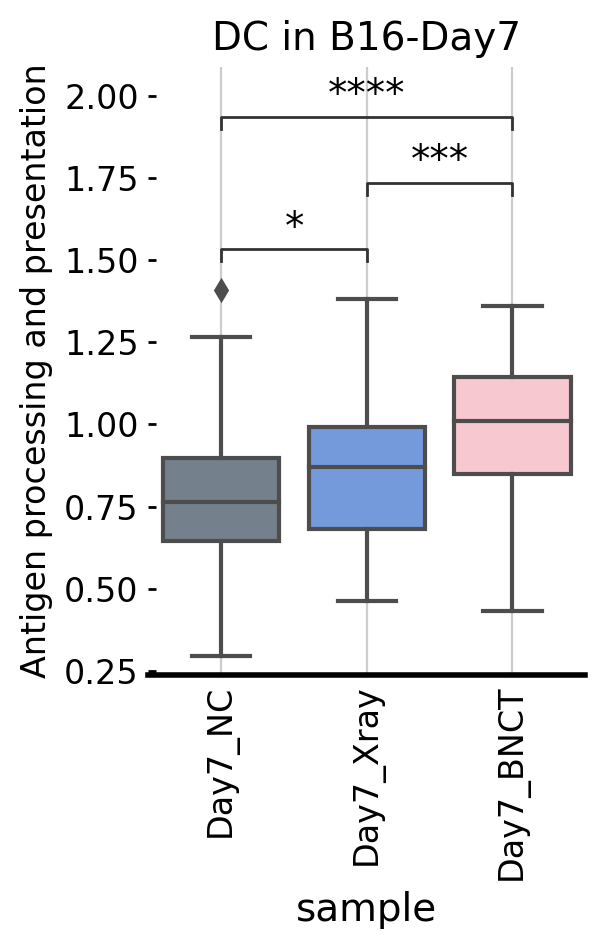

In [46]:

df = dc.obs[["sample",'score']]
x = "sample"
y = 'score'
y_label = 'Antigen processing and presentation'

order=['Day1_NC','Day1_Xray','Day1_BNCT']
fig,ax = plt.subplots(figsize=(2.8,4),dpi=100,facecolor="w")
ax = sns.boxplot(data=df, x=x, y=y, order=order,ax=ax,palette=['slategrey', 'cornflowerblue', 'pink'])
plt.grid()
pairs=[("Day1_NC", "Day1_BNCT"), ("Day1_NC", "Day1_Xray"), ("Day1_Xray", "Day1_BNCT")]
annotator = Annotator(ax, pairs, data=df, x=x, y=y, order=order)
annotator.configure(test='Mann-Whitney', text_format='star', line_height=0.03,line_width=1)
annotator.apply_and_annotate()
ax.tick_params(which='major',direction='in',length=3,width=1.,labelsize=12,bottom=False)
for spine in ["top","left","right"]:
    ax.spines[spine].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
plt.ylabel(y_label, size=12)
ax.set_axisbelow(True)
ax.set_ylabel('Antigen processing and presentation')
ax.set_xticklabels(labels=['Day1_NC','Day1_Xray','Day1_BNCT'], rotation=90)
plt.ylabel(y_label, size=12)
plt.title('DC in B16-Day1')
plt.show()

order=['Day7_NC','Day7_Xray','Day7_BNCT']
fig,ax = plt.subplots(figsize=(2.8,4),dpi=100,facecolor="w")
ax = sns.boxplot(data=df, x=x, y=y, order=order,ax=ax,palette=['slategrey', 'cornflowerblue', 'pink'])
plt.grid()
pairs=[("Day7_NC", "Day7_BNCT"), ("Day7_NC", "Day7_Xray"), ("Day7_Xray", "Day7_BNCT")]
annotator = Annotator(ax, pairs, data=df, x=x, y=y, order=order)
annotator.configure(test='Mann-Whitney', text_format='star', line_height=0.03,line_width=1)
annotator.apply_and_annotate()
ax.tick_params(which='major',direction='in',length=3,width=1.,labelsize=12,bottom=False)
for spine in ["top","left","right"]:
    ax.spines[spine].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
plt.ylabel(y_label, size=12)
ax.set_axisbelow(True)
ax.set_ylabel('Antigen processing and presentation')
ax.set_xticklabels(labels=['Day7_NC','Day7_Xray','Day7_BNCT'], rotation=90) 
plt.ylabel(y_label, size=12)
plt.title('DC in B16-Day7')
plt.show()


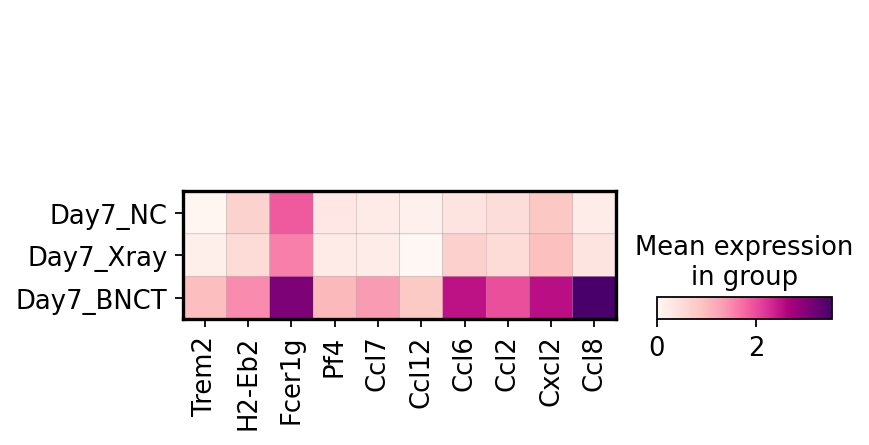

In [53]:
sc.pl.matrixplot(dc[dc.obs['sample'].isin(['Day7_NC','Day7_Xray','Day7_BNCT'])], ['Trem2', 'H2-Eb2', 'Fcer1g', 'Pf4', 'Ccl7','Ccl12', 'Ccl6',  'Ccl2', 'Cxcl2','Ccl8'],
                 'sample', cmap='RdPu',  dendrogram=False, show=False # colorbar_title='sample scaled',  standard_scale='var',
                ) 
plt.show()

### T

In [57]:
T_cluster = sc.read('/home/zhaoyp/BNCT/B16/T_adata.h5ad')


/home/zhaoyp/miniconda3/envs/py38/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


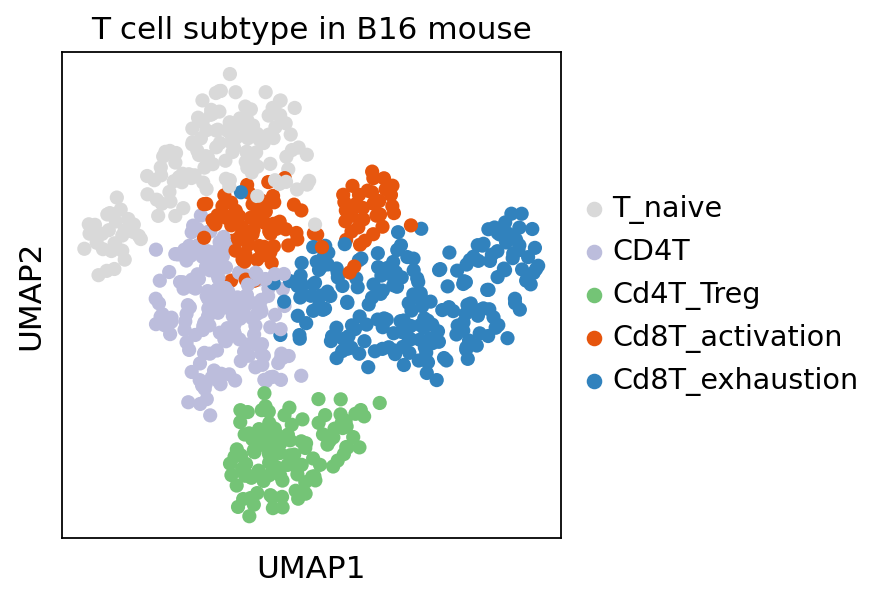

/home/zhaoyp/miniconda3/envs/py38/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


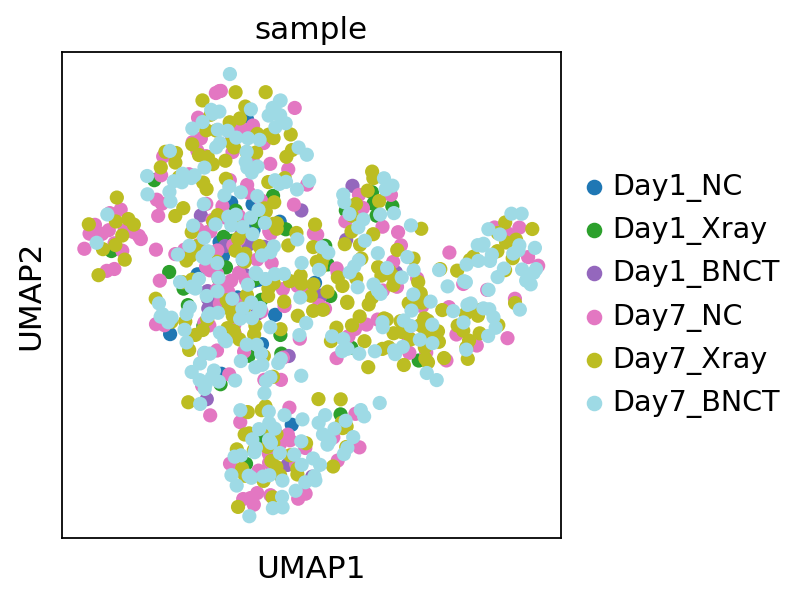

In [58]:
sc.pl.umap(T_cluster,color='cell_type',palette='tab20c_r',title='T cell subtype in B16 mouse')

sc.pl.umap(T_cluster,color='sample',palette='tab20')


/home/zhaoyp/TEMPDIR/ipykernel_205975/829673526.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[cell_type] = np.array(data[cell_type])
/home/zhaoyp/TEMPDIR/ipykernel_205975/829673526.py:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-pastel")


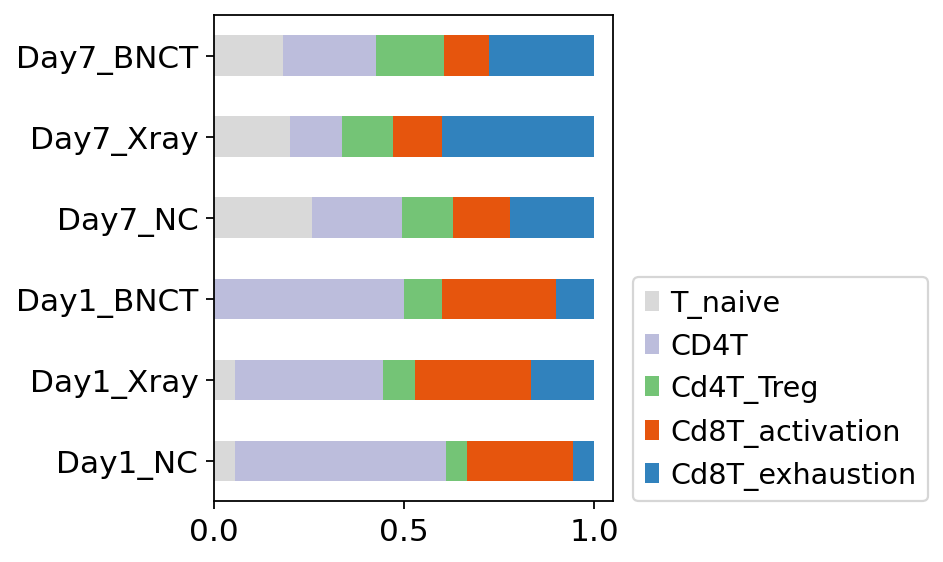

In [60]:
plot_freq(T_cluster, 'sample', 'cell_type', density=True, sort=False,
          row = ['Day1_NC','Day1_Xray','Day1_BNCT','Day7_NC','Day7_Xray','Day7_BNCT' ], column = ['T_naive','CD4T','Cd4T_Treg','Cd8T_activation','Cd8T_exhaustion'], cmap='tab20c_r' )


/home/zhaoyp/miniconda3/envs/py38/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:748: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


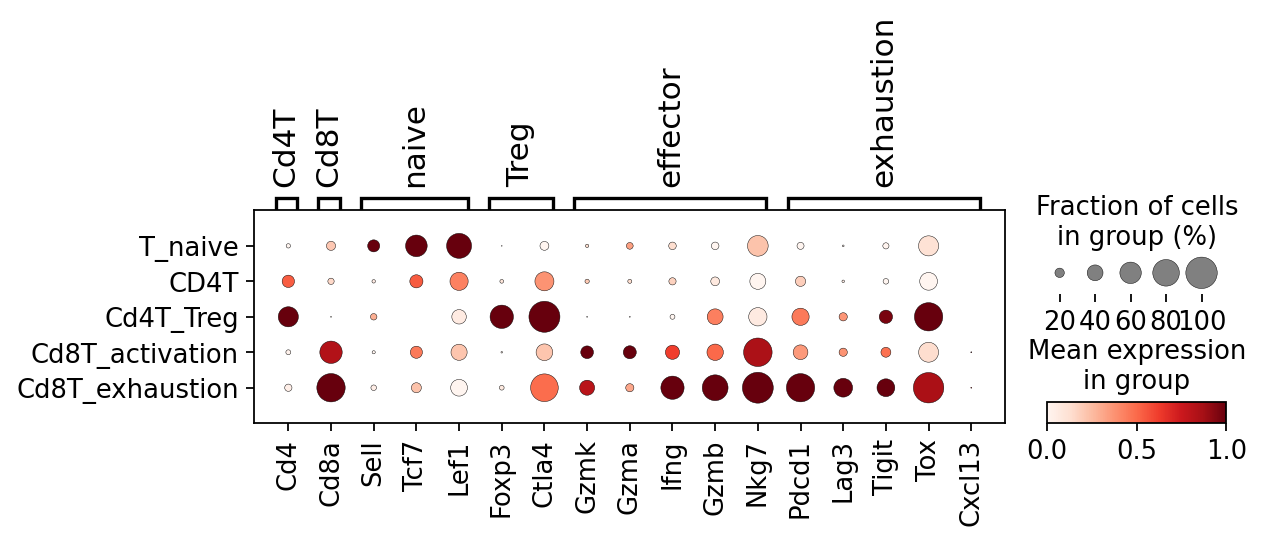

In [63]:
sc.pl.dotplot(T_cluster, {'Cd4T':'Cd4','Cd8T':['Cd8a'],  'naive':['Sell','Tcf7','Lef1'], 'Treg':['Foxp3','Ctla4'], 'effector':['Gzmk','Gzma','Ifng','Gzmb','Nkg7'],
                           'exhaustion':['Pdcd1','Lag3','Tigit','Tox','Cxcl13']},  standard_scale='var', groupby='cell_type')


/home/zhaoyp/miniconda3/envs/py38/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:175: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[score_name] = pd.Series(


Day1_NC vs. Day1_Xray: Mann-Whitney-Wilcoxon test two-sided, P_val:7.077e-01 U_stat=5.700e+01
Day1_Xray vs. Day1_BNCT: Mann-Whitney-Wilcoxon test two-sided, P_val:4.747e-01 U_stat=8.100e+01
Day1_NC vs. Day1_BNCT: Mann-Whitney-Wilcoxon test two-sided, P_val:5.728e-01 U_stat=2.900e+01
Day7_NC vs. Day7_Xray: Mann-Whitney-Wilcoxon test two-sided, P_val:5.401e-01 U_stat=3.771e+03
Day7_Xray vs. Day7_BNCT: Mann-Whitney-Wilcoxon test two-sided, P_val:3.943e-03 U_stat=5.001e+03
Day7_NC vs. Day7_BNCT: Mann-Whitney-Wilcoxon test two-sided, P_val:3.399e-02 U_stat=2.599e+03


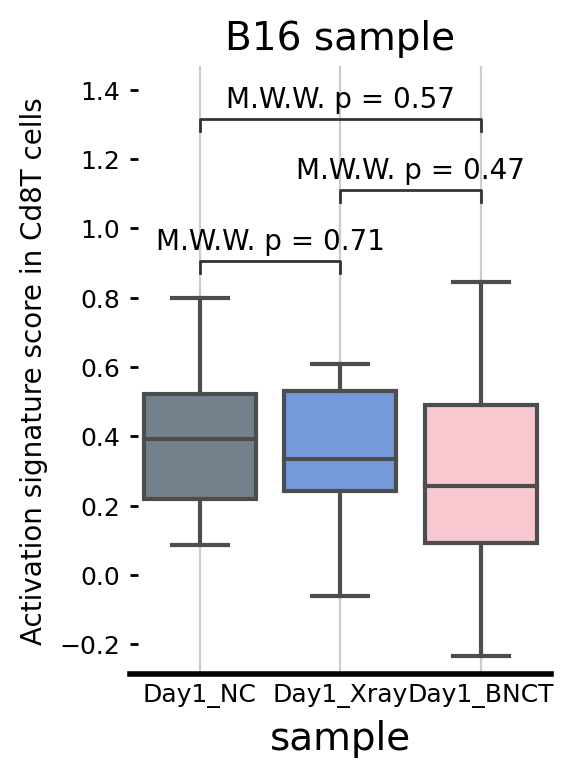

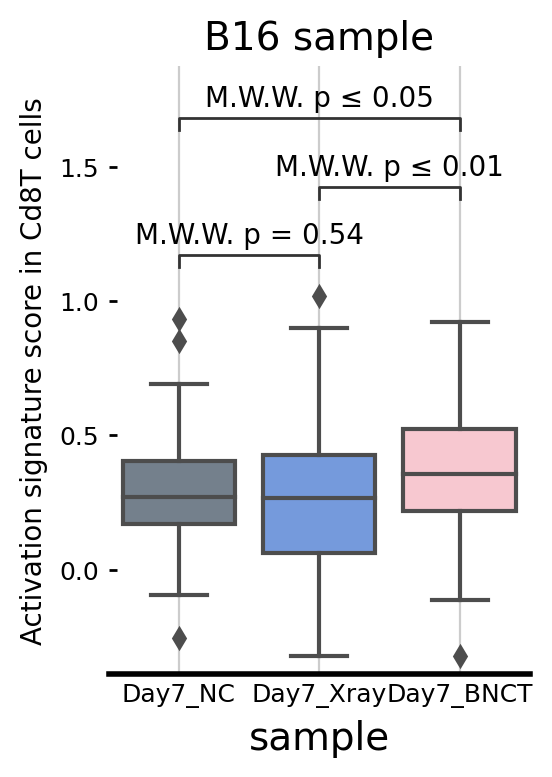

In [64]:
T_adata = T_cluster[T_cluster.obs['cell_type'].isin(['Cd8T_naive', 'Cd8T_activation', 'Cd8T_exhaustion'])]
act_sig = ["SARS2","0610009O20RIK","ARPP19","SDF2L1","TBCC","MYG1","SEPHS1","DYNC1LI1","ZBTB38","TARDBP","SLC9A8","TYK2","THUMPD3","MRPL16","ACOT8","LRRK1",
           "HMGB1","HSPA1B","TCEA1","MAVS","VPS53","RIT1","SNAPC1","DNAAF2","COMMD10","PMPCB","EHBP1L1","ADAT3","DOHH","LSM4","PTCD1","GMPPB","LAMTOR1","DRG2","CDCA7L",
           "SSBP1","ANAPC15","NAGLU","AKR1B3","PAOX","EIF4E2","GPAA1","RAD50","STX18","GRPEL1","VMP1","HIST1H1C","ZFP429","GGH","TAF6","RBM18",
           "2700029M09RIK","EXOSC4","ABHD10","DNAJC14","DPCD","ATPBD4","SERPINA3F","CTCF","LMAN1","NEU3","HAUS5","USF1","AAR2","FARSB","COG4","COG2","FKBP2","SLC35A1",
           "DPY30","ALDH3A2","1110008P14RIK","KLRE1","ZDHHC6","RAD18","TSPAN4","METTL20","NUDT16L1","TMEM167","IPP","INIP","REEP4","ERP44","GIMAP7","CYB5B","ACAT2","ANAPC5",
           "PUF60","SLBP","MTG1","ACTR10","CCDC127","KPNB1"]
act_sig = [x[0]+x[1:].lower() for x in act_sig] 
act_sig1 = ['IFNG','TNF','CTLA4','HAVCR2','PDCD1','ENTPD1','TCF7','TOX','EOMES','TBX21','STAT1','STAT2','NFATC3','NFATC1','NFATC2','YY1','SMAD2','SMAD3','SMAD4','TIGIT','LAG3','MAF','NFIL3','PRDM1','IL2','CD28','JAK3','BCL6','SLAMF6','CXCR5','ICOS','IL15RA','IL18R1','IL18RAP','KLRK1','KLRG1','CXCL13','CXCL9','CXCL10']
act_sig1 = [x[0]+x[1:].lower() for x in act_sig1] 


sc.tl.score_genes(T_adata, act_sig1, ctrl_size=500, gene_pool=None, n_bins=25, score_name='score', random_state=0, copy=False, use_raw=None)
# sc.pl.violin(T_adata, ['score'],groupby='sample',rotation=90, ylabel='Activation Signature')

df = T_adata.obs[["sample","score"]]
x = "sample"
y = "score"
order=['Day1_NC','Day1_Xray','Day1_BNCT']
fig,ax = plt.subplots(figsize=(2.7,4),dpi=100,facecolor="w")
ax = sns.boxplot(data=df, x=x, y=y, order=order,ax=ax,palette=['slategrey', 'cornflowerblue', 'pink'])
plt.grid()
pairs=[("Day1_Xray", "Day1_NC"), ("Day1_BNCT", "Day1_NC"),  ("Day1_BNCT", "Day1_Xray")]
annotator = Annotator(ax, pairs, data=df, x=x, y=y, order=order)
annotator.configure(test='Mann-Whitney', text_format='simple', line_height=0.03,line_width=1,text_offset=2) #Mann-Whitney
annotator.apply_and_annotate()
ax.tick_params(which='major',direction='in',length=3,width=1.,labelsize=9,bottom=False)
for text in ax.texts:
    text.set_fontsize(10) 
for spine in ["top","left","right"]:
    ax.spines[spine].set_visible(False)
ax.spines['bottom'].set_linewidth(2) 
ax.set_axisbelow(True)
ax.set_ylabel('Activation signature score in Cd8T cells', size=10 )
plt.title('B16 sample')

df = T_adata.obs[["sample","score"]]
x = "sample"
y = "score"
order=['Day7_NC','Day7_Xray','Day7_BNCT']
fig,ax = plt.subplots(figsize=(2.7,4),dpi=100,facecolor="w")
ax = sns.boxplot(data=df, x=x, y=y, order=order,ax=ax,palette=['slategrey', 'cornflowerblue', 'pink'])
plt.grid()
pairs=[("Day7_Xray", "Day7_NC"), ("Day7_BNCT", "Day7_NC"),  ("Day7_BNCT", "Day7_Xray")]
annotator = Annotator(ax, pairs, data=df, x=x, y=y, order=order)
annotator.configure(test='Mann-Whitney', text_format='simple', line_height=0.03,line_width=1,text_offset=2) #Mann-Whitney
annotator.apply_and_annotate()
ax.tick_params(which='major',direction='in',length=3,width=1.,labelsize=9, bottom=False )
for text in ax.texts:
    text.set_fontsize(10) 
for spine in ["top","left","right"]:
    ax.spines[spine].set_visible(False)
ax.spines['bottom'].set_linewidth(2) 
ax.set_axisbelow(True)
ax.set_ylabel('Activation signature score in Cd8T cells', size=10)
plt.title('B16 sample')
plt.savefig('/home/zhaoyp/BNCT/Figures_1/5_supply.pdf',  bbox_inches='tight')


### NK

In [65]:
nk_adata = normal[normal.obs['cell_type']=='NK']

In [66]:
# GO:0042267  natural killer cell mediated cytotoxicity

nk_sig=np.sort(['Coro1a','Sh2d1b1','Fcgr4','Cebpg','Sh2d1a','Il18','Il21','Rnf19b','Gzmb','Gzmn','Nkg7','Stat5a','Stat5b','Prdx1',
'Kif5b','Stﬁx11','Ulbp3','Ulbp1','Ptpn6','Gzme','Gzmc','Gzmd','Gzmf','Gzmg','Raet1d','Rab27a','H60c','Vamp7',
'Unc13d','Sh2d1b2','Arl8b','Lag3','H60b','Plekhm2'])


Day7_NC vs. Day7_Xray: Mann-Whitney-Wilcoxon test two-sided, P_val:1.451e-02 U_stat=3.226e+03
Day7_Xray vs. Day7_BNCT: Mann-Whitney-Wilcoxon test two-sided, P_val:2.480e-04 U_stat=1.595e+04
Day7_NC vs. Day7_BNCT: Mann-Whitney-Wilcoxon test two-sided, P_val:3.586e-09 U_stat=6.567e+03


/home/zhaoyp/miniconda3/envs/py38/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:175: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[score_name] = pd.Series(


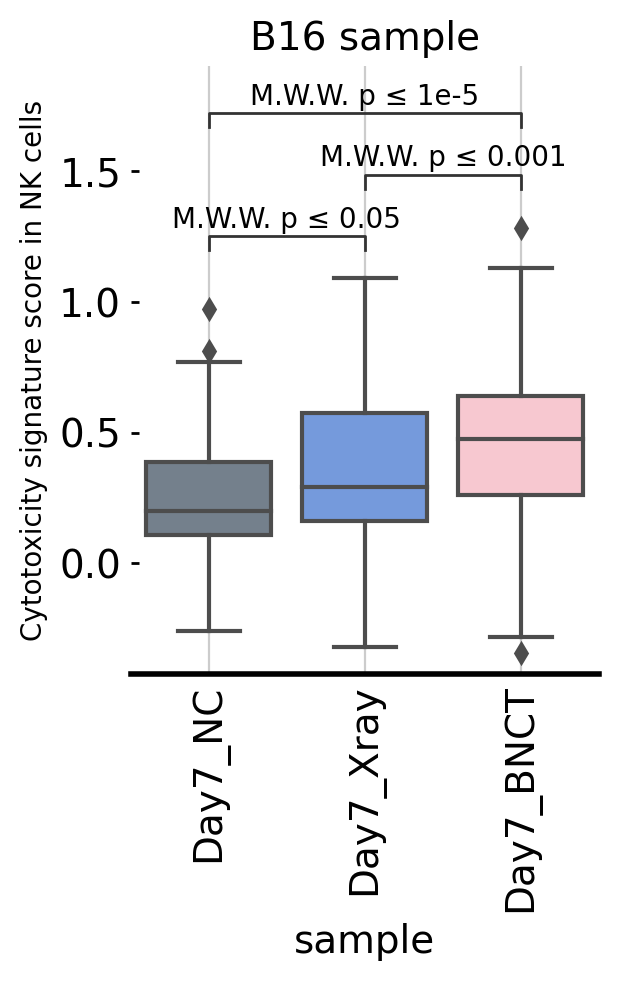

In [67]:
sc.tl.score_genes(nk_adata, nk_sig, ctrl_size=500, gene_pool=None, n_bins=25, score_name='score', random_state=0, copy=False, use_raw=None)

df = nk_adata.obs[["sample","score"]]
x = "sample"
y = "score"
order=['Day7_NC','Day7_Xray','Day7_BNCT']
fig,ax = plt.subplots(figsize=(3,4),dpi=100,facecolor="w")
ax = sns.boxplot(data=df, x=x, y=y, order=order,ax=ax,palette=['slategrey', 'cornflowerblue', 'pink'])
plt.grid()
plt.ylabel('Cytotoxicity signature score in NK cells', size=10)
pairs=[("Day7_NC", "Day7_BNCT"), ("Day7_NC", "Day7_Xray"), ("Day7_Xray", "Day7_BNCT")]
annotator = Annotator(ax, pairs, data=df, x=x, y=y, order=order)
annotator.configure(test='Mann-Whitney', text_format='simple', line_height=0.03,line_width=1,fontsize=10)
annotator.apply_and_annotate()
ax.tick_params(which='major',direction='in',length=3,width=1.,labelsize=14,bottom=False)
ax.set_xticks([0,1,2],['Day7_NC','Day7_Xray','Day7_BNCT'],rotation=90)
for spine in ["top","left","right"]:
    ax.spines[spine].set_visible(False)
ax.spines['bottom'].set_linewidth(2) 
ax.set_axisbelow(True) 
plt.title('B16 sample')
plt.show()


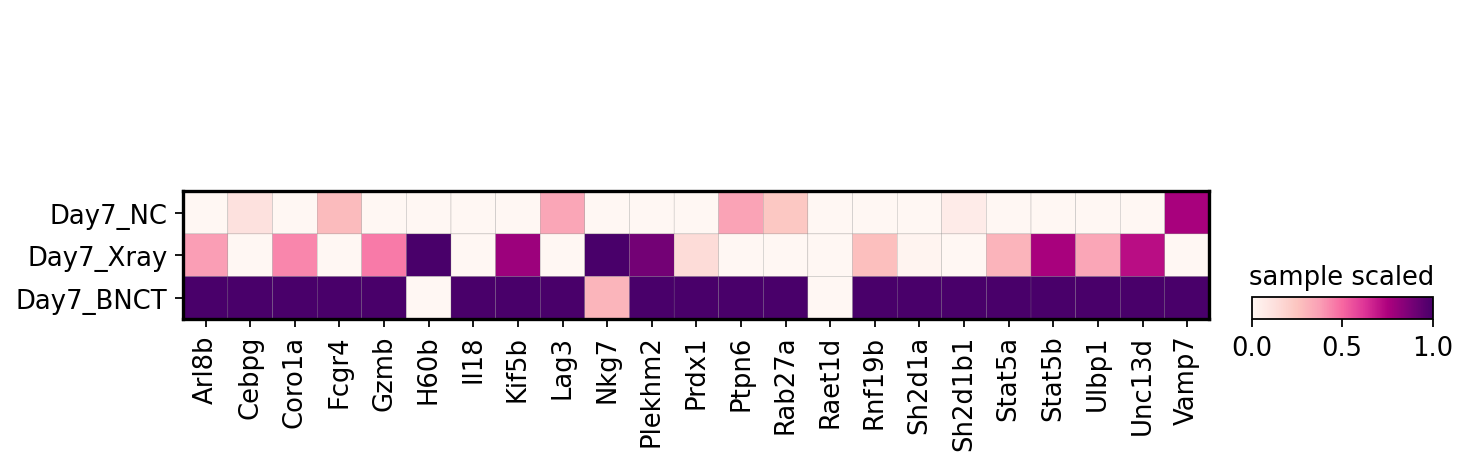

In [68]:
sc.pl.matrixplot(nk_adata[nk_adata.obs['sample'].isin(['Day7_NC','Day7_Xray','Day7_BNCT'])], [x for x in nk_sig if x in nk_adata.var_names],# +antigen+p53+['Ccl3','Ccl4','Ccl6',"Cdk1","Cdk2","Bbc3","Bax","Bcl2",'Cxcl10'],
                 'sample', cmap='RdPu',  dendrogram=False,  colorbar_title='sample scaled', standard_scale='var')


# MC38

## Import files

In [73]:
adata_ann = sc.read_h5ad('/home/zhaoyp/BNCT/Data_final/adata_mc38.h5ad')


/home/zhaoyp/miniconda3/envs/py38/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/zhaoyp/miniconda3/envs/py38/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


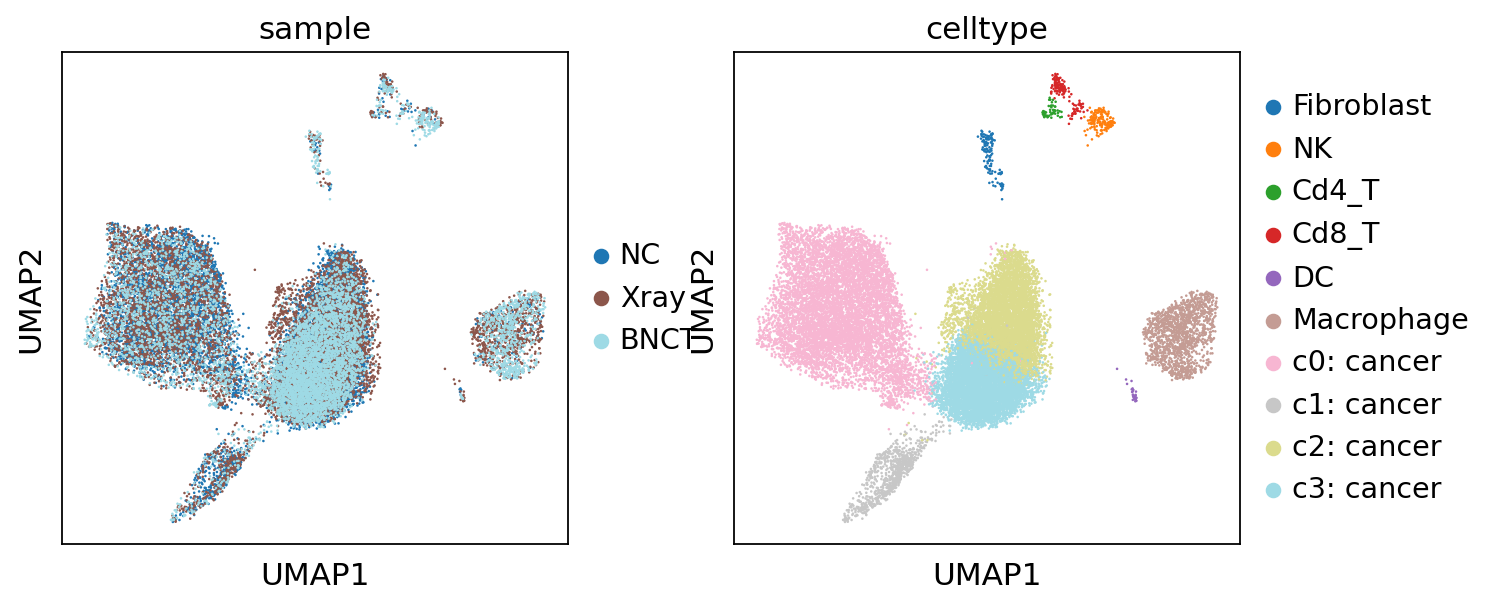

In [106]:
sc.pl.umap(adata_ann, color=['sample', 'celltype'],palette='tab20')


/home/zhaoyp/TEMPDIR/ipykernel_205975/829673526.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[cell_type] = np.array(data[cell_type])
/home/zhaoyp/TEMPDIR/ipykernel_205975/829673526.py:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-pastel")
/home/zhaoyp/TEMPDIR/ipykernel_205975/829673526.py:17: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  b = b.loc[row,column]


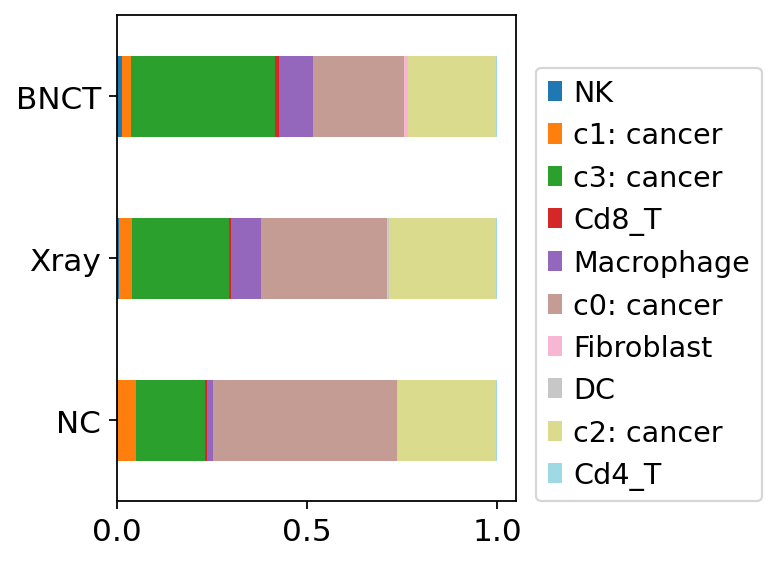

In [107]:
plot_freq(adata_ann, 'sample', 'celltype', density=True, sort=False,
          row = ['NC','Xray','BNCT' ], column =set(adata_ann.obs['celltype']), cmap='tab20' )


categories: Fibroblast, NK, Cd4_T, etc.
var_group_labels: Fibro, NK cell, T cell, etc.


/home/zhaoyp/miniconda3/envs/py38/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:748: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


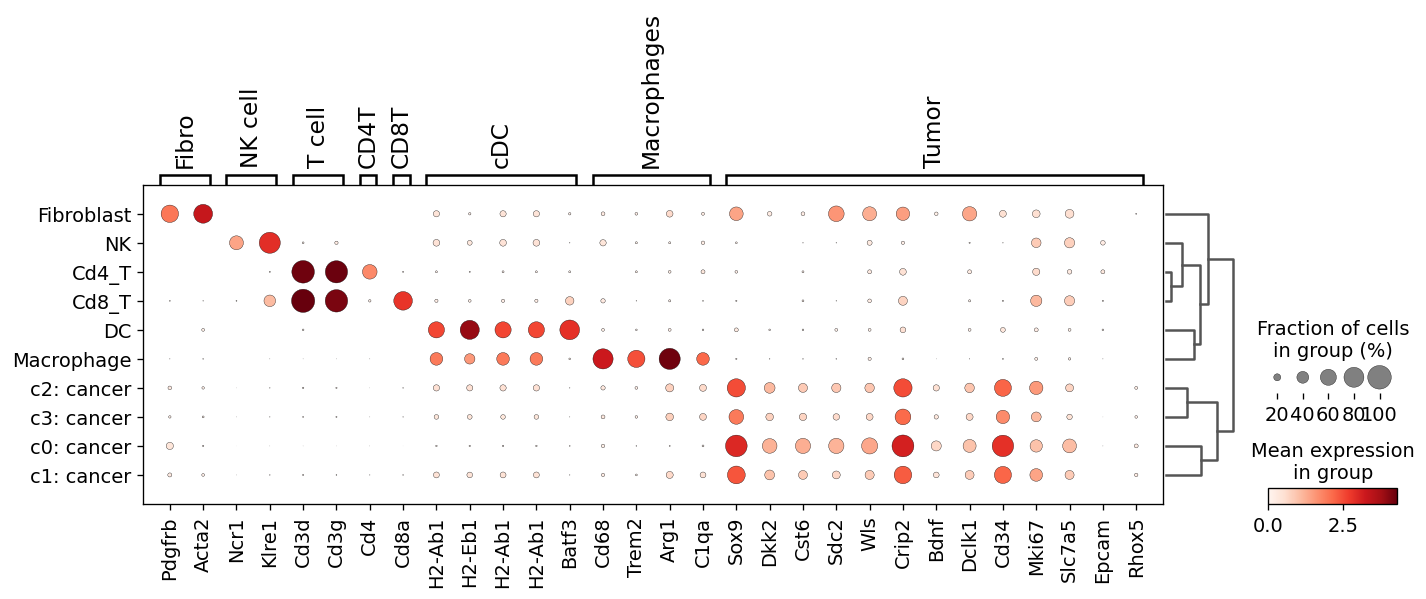

In [79]:
marker_genes_dict = { 'Fibro': ['Pdgfrb','Acta2'], # 'Col1a1','Col1a2', #'Leukocytes': ["Ptprc"], #'Myeloid cells': [ 'Itgam','Itgax'],
                     'NK cell': ['Ncr1','Klre1'],  # , 'Il2rb'
                     'T cell': ['Cd3d', 'Cd3g'], 'CD4T':['Cd4'],'CD8T':['Cd8a'],   #'B cell': [  'Cd79a', 'Cd79b'],
                     'cDC':['H2-Ab1', 'H2-Eb1', 'H2-Ab1', 'H2-Ab1', 'Batf3'], # 'H2-DMa', 
                     'Macrophages': [ 'Cd68', 'Trem2', 'Arg1','C1qa'],
                      'Tumor': ['Sox9','Dkk2','Cst6', "Sdc2", "Wls", "Crip2", "Bdnf", "Dclk1", 'Cd34', 'Mki67','Slc7a5','Epcam',
                                'Rhox5'],
                     # 'Endo': ["Vwf",'Cdh5','Pecam1']
                      }
sc.settings.set_figure_params(dpi=60)
sc.tl.dendrogram(adata_ann, groupby="celltype")
sc.pl.dotplot(adata_ann, marker_genes_dict, 'celltype', dendrogram=True,show=False)
plt.show()

## Tumor

In [108]:
tumor = adata_ann[adata_ann.obs['celltype'].isin(['c0: cancer','c1: cancer','c2: cancer','c3: cancer'])] 


/home/zhaoyp/TEMPDIR/ipykernel_205975/829673526.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[cell_type] = np.array(data[cell_type])
/home/zhaoyp/TEMPDIR/ipykernel_205975/829673526.py:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-pastel")


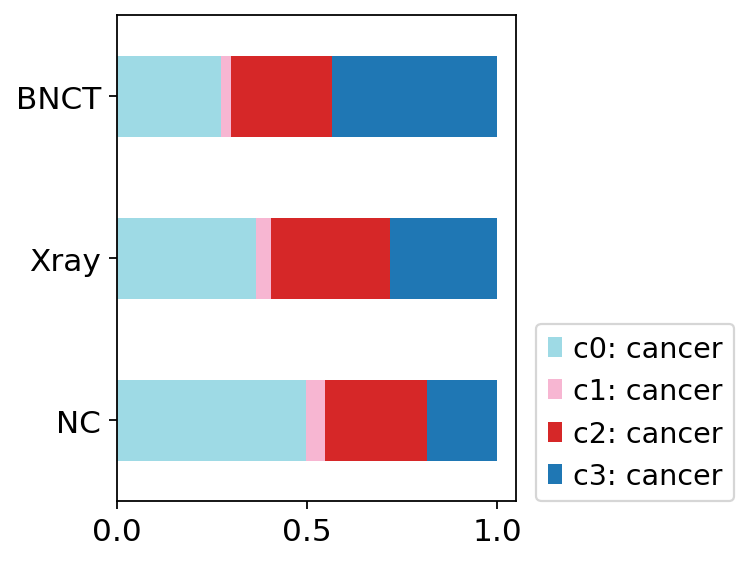

In [110]:
plot_freq(tumor, 'sample', 'celltype', density=True, sort=False,
          row = ['NC', 'Xray', 'BNCT'] , column = sorted(list(set(tumor.obs['celltype']))) )


/home/zhaoyp/miniconda3/envs/py38/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:175: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[score_name] = pd.Series(


/home/zhaoyp/TEMPDIR/ipykernel_205975/829673526.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[cell_type] = np.array(data[cell_type])
/home/zhaoyp/TEMPDIR/ipykernel_205975/829673526.py:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-pastel")


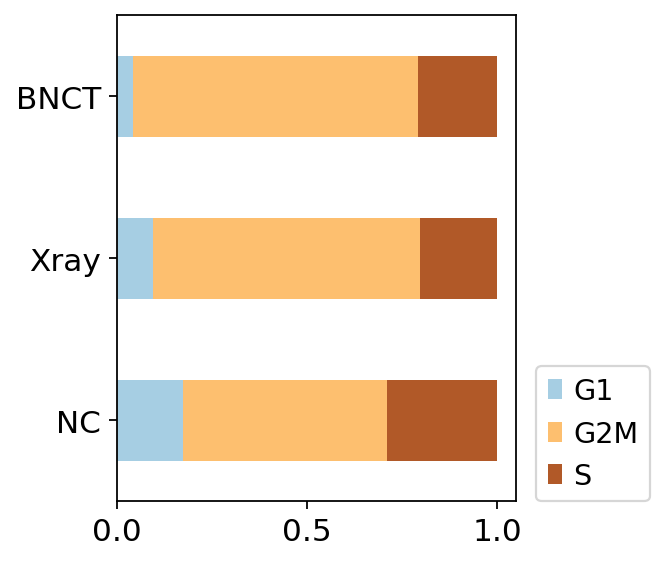

In [104]:
sc.tl.score_genes_cell_cycle(tumor, s_genes, g2m_genes) 
plot_freq(tumor, 'sample', 'phase', density=True, sort=False,
          row = ['NC', 'Xray', 'BNCT'] , column = sorted(list(set(tumor.obs['phase']))), cmap='Paired' ) 


/home/zhaoyp/TEMPDIR/ipykernel_205975/530444502.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[cell_type] = np.array(data[cell_type])
/home/zhaoyp/TEMPDIR/ipykernel_205975/530444502.py:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-pastel")


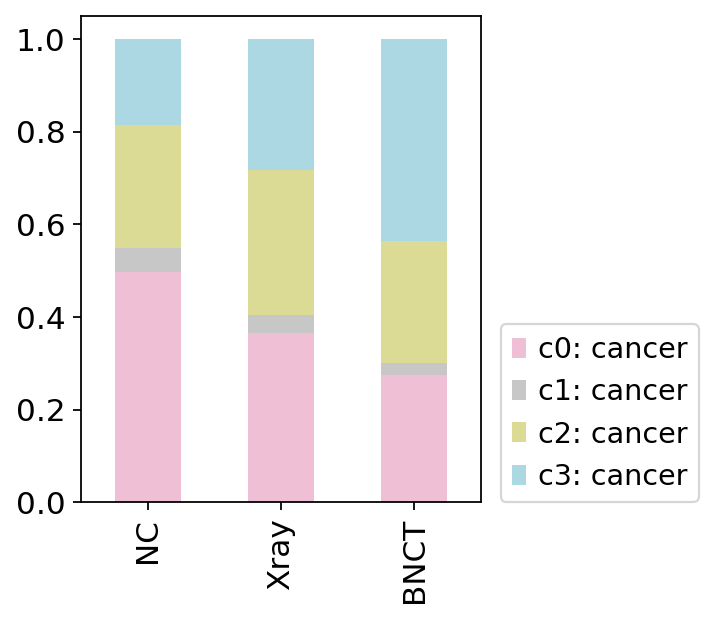

In [89]:
# plot_freq(tumor, 'sample', 'celltype', density=True, sort=False,
#           row = ['NC', 'Xray', 'BNCT'] , column = sorted(list(set(tumor.obs['celltype']))), cmap=['#EEBFD5','#C7C7C7','#DBDB96','#ABD8E3'] ) 

sample ='sample'
cell_type='celltype'
row = ['NC', 'Xray', 'BNCT']
column = sorted(list(set(tumor.obs['celltype'])))
sc.settings.set_figure_params(dpi=80)
data = tumor.obs[[sample,cell_type]]
data[cell_type] = np.array(data[cell_type])
b=data.groupby([sample]).value_counts([cell_type],normalize=True).reset_index().pivot(index=sample, 
        columns=cell_type)
b.index.name = None
b.columns.names = [None,None]
b.columns = b.columns.droplevel(0)
plt.style.use("seaborn-pastel")
b = b.loc[row,column]
b.plot(kind='bar',stacked=True,figsize=(3.2,4),grid=False,table=False,legend=True, color=['#EEBFD5','#C7C7C7','#DBDB96','#ABD8E3']) #tab20_r
plt.legend(bbox_to_anchor=(1.05,0), loc=3, borderaxespad=0)
plt.show()


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

c2: cancer vs. c3: cancer: Mann-Whitney-Wilcoxon test two-sided, P_val:0.000e+00 U_stat=2.854e+07
c1: cancer vs. c3: cancer: Mann-Whitney-Wilcoxon test two-sided, P_val:5.595e-185 U_stat=3.996e+06
c0: cancer vs. c3: cancer: Mann-Whitney-Wilcoxon test two-sided, P_val:0.000e+00 U_stat=4.545e+07


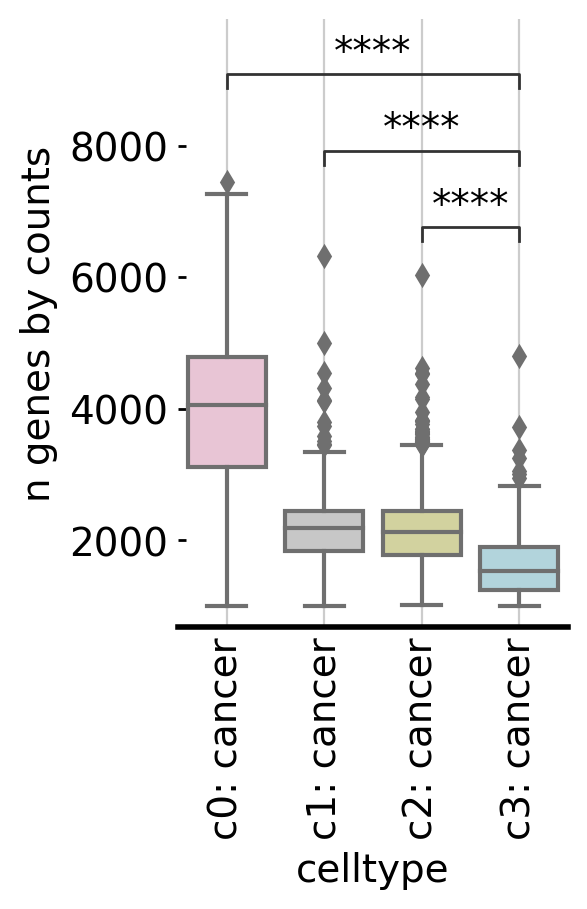

In [92]:
# sc.pl.violin(adata_ann,keys='n_genes',groupby='cell_type',rotation=90)

df = tumor.obs[["celltype","n_genes"]]
x = "celltype"
y = "n_genes"
order=['c0: cancer','c1: cancer','c2: cancer','c3: cancer']

fig,ax = plt.subplots( figsize=(2.5,4),dpi=100,facecolor="w")
ax = sns.boxplot(data=df, x=x, y=y, order=order,ax=ax, palette=['#EEBFD5','#C7C7C7','#DBDB96','#ABD8E3'])
plt.grid()
pairs=[('c0: cancer', 'c3: cancer'),('c1: cancer', 'c3: cancer'),('c2: cancer', 'c3: cancer')]
annotator = Annotator(ax, pairs, data=df, x=x, y=y, order=order)
annotator.configure(test='Mann-Whitney', text_format='star', line_height=0.03,line_width=1) #Mann-Whitney
annotator.apply_and_annotate() 
ax.tick_params(which='major',direction='in',length=3, width=1.,labelsize=14, bottom=False)
for spine in ["top","left","right"]:
    ax.spines[spine].set_visible(False)
ax.spines['bottom'].set_linewidth(2) 
ax.set_axisbelow(True)
ax.set_xticks([0,1,2,3],['c0: cancer','c1: cancer','c2: cancer','c3: cancer'],rotation=90)
ax.set_ylabel('n genes by counts')
plt.show()


## Immune

In [95]:
dc = adata_ann[adata_ann.obs['celltype'].isin(['DC'])] 
sig=['Cd68','Cd1d1','Mfsd6','Ifi30','Tapbpl','H2-Eb2','Ctse','Mpeg1','H2-Aa','H2-Eb1','H2-Q9','H2-Q8','H2-T24','2410137M14Rik','Tapbp','H2-Ob','H2-Oa','Raet1e','Mill2','Mill1','Raet1d','H60c','H60b','Tap2','H2-Ab1','Cd74','Raet1a','Raet1c','H2-M3','H2-DMb2','H2-DMb1','Unc93b1','Marchf1','Marchf8','Ulbp1','Raet1b','Hfe','Tap1','H2-T7','Clec4b2','H2-D1','H2-T5','H2-Q7','H2-Q6','H2-Q4','H2-Q2','H2-Q10','H2-K1','H2-Q1','Ide','H2-T23','B2m','Fgl2','H2-M10.3','H2-T3','H2-T22','H2-M2','H2-M1','H2-L','H2-M5','H2-M10.2','H2-M10.6','H2-M9','H2-M10.4','H2-M10.5','H2-M10.1','H2-M11','H2-DMa','Lgmn','Ctss','Pikfyve','Mr1','Fcgr3','Fcgr1','H2-T9','Arl8b','Psme1','Psme2','Fcer1g','Wdfy4','Ap3d1','Fcgr2b','Ap3b1','Kdm5d','Treml4','Pdia3','Psmb8','Rab33a','Pycard','Rftn1','Traf6','Slc11a1','Calr','Fcgr4','Fcer2a','Nod1','Rab3c','Psmb9','Rab5b','Bag6','Thbs1','Trem2','Ctsl','Rab32','Rab6a','Ythdf1','Ccl21a','Rab4a','Ccl19','Rab35','Icam1','Was','Washc1','Ccr7','Psap','Rab34','Rab8b','Rab3b','Rab10','Atg5','Trex1','Relb','Flt3','Nod2','Rab27a','Ext1','Gba1','Ifng']
sc.tl.score_genes(dc, sig)


/home/zhaoyp/miniconda3/envs/py38/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:175: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[score_name] = pd.Series(


NC vs. Xray: Mann-Whitney-Wilcoxon test two-sided, P_val:7.333e-01 U_stat=6.300e+01
Xray vs. BNCT: Mann-Whitney-Wilcoxon test two-sided, P_val:2.377e-01 U_stat=5.300e+01
NC vs. BNCT: Mann-Whitney-Wilcoxon test two-sided, P_val:6.620e-01 U_stat=2.000e+01


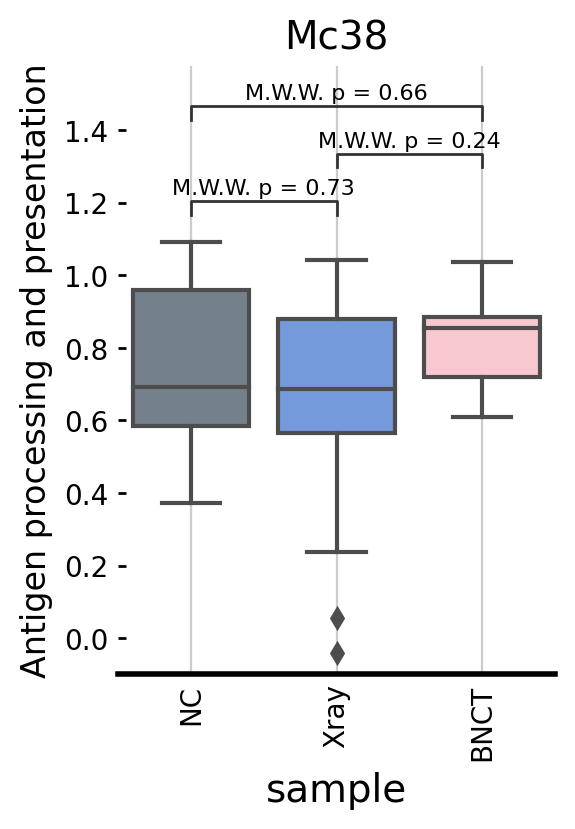

In [96]:
df = dc.obs[["sample",'score']]
x = "sample"
y = 'score'
y_label = 'Antigen processing and presentation'

order=['NC','Xray','BNCT']
fig,ax = plt.subplots(figsize=(2.8,4),dpi=100,facecolor="w")
ax = sns.boxplot(data=df, x=x, y=y, order=order,ax=ax,palette=['slategrey', 'cornflowerblue', 'pink'])
plt.grid()
pairs=[("NC", "BNCT"), ("NC", "Xray"), ("Xray", "BNCT")]
annotator = Annotator(ax, pairs, data=df, x=x, y=y, order=order)
annotator.configure(test='Mann-Whitney', text_format='simple', line_height=0.03,line_width=1,fontsize=8) #
annotator.apply_and_annotate()
ax.tick_params(which='major',direction='in',length=3,width=1.,labelsize=10,bottom=False)
for spine in ["top","left","right"]:
    ax.spines[spine].set_visible(False)
ax.spines['bottom'].set_linewidth(2) 
ax.set_axisbelow(True)
ax.set_ylabel('Antigen processing and presentation')
ax.set_xticklabels(labels=['NC','Xray','BNCT'], rotation=90)
plt.ylabel(y_label, size=12)
plt.title('Mc38')
plt.show()


In [97]:
T = adata_ann[adata_ann.obs['celltype'].isin(['Cd4_T','Cd8_T'])]  

In [98]:
T_adata = T[T.obs['cell_type'] == 'Cd8_T'] 
act_sig = ["SARS2","0610009O20RIK","ARPP19","SDF2L1","TBCC","MYG1","SEPHS1","DYNC1LI1","ZBTB38","TARDBP","SLC9A8","TYK2","THUMPD3","MRPL16","ACOT8","LRRK1",
           "HMGB1","HSPA1B","TCEA1","MAVS","VPS53","RIT1","SNAPC1","DNAAF2","COMMD10","PMPCB","EHBP1L1","ADAT3","DOHH","LSM4","PTCD1","GMPPB","LAMTOR1","DRG2","CDCA7L",
           "SSBP1","ANAPC15","NAGLU","AKR1B3","PAOX","EIF4E2","GPAA1","RAD50","STX18","GRPEL1","VMP1","HIST1H1C","ZFP429","GGH","TAF6","RBM18",
           "2700029M09RIK","EXOSC4","ABHD10","DNAJC14","DPCD","ATPBD4","SERPINA3F","CTCF","LMAN1","NEU3","HAUS5","USF1","AAR2","FARSB","COG4","COG2","FKBP2","SLC35A1",
           "DPY30","ALDH3A2","1110008P14RIK","KLRE1","ZDHHC6","RAD18","TSPAN4","METTL20","NUDT16L1","TMEM167","IPP","INIP","REEP4","ERP44","GIMAP7","CYB5B","ACAT2","ANAPC5",
           "PUF60","SLBP","MTG1","ACTR10","CCDC127","KPNB1"]
act_sig = [x[0]+x[1:].lower() for x in act_sig] 

exh_sig = ["NPEPPS","NOTCH2","CABLES1","CERK","MTMR3","RELB","KLF3","CAMK2D","CCNG2","SLC25A33","PIM3","RNF149","SWAP70","PINK1","RAB2A","FAM168B","MAP2K7","MIR466I","ASAP1",
       "GRASP","POU2AF1","GATA3","B3GNT2","FAS","PIAS2","FOXO1","SEC24B","TUBB2B","PARP3","PIGH","BRAP","ATP6V0D1","IFT80","FRRS1","GPR132","SFPI1","SH2B3","WFDC17","CD74",
       "TBC1D22B","CD19","PHC2","TRAT1","SLAMF6","YPEL3","RARA","GM9159","MAN1A","CRTC3","MKRN1","BCL6","CLN6","MYB","NDUFV1","SLC28A2","FBXL20","SCIN","LGMN","WTAP","BCL3",
       "SLC2A6","IL2RG","SNTB1","KDM5B","UTP15","LATS2","RASSF2","IFI30","KDM4B","IER5","CD5","MNDAL","PCGF5","GPR35","SPRY1","TNIP1","CSNK1D","NSMCE1","NR4A1","OSBPL11",
       "PNRC1","ITGAE","SNX18","TMEM55B","IKZF2","ISCU","FAM196B","TMEM243","ZFP62","RASGEF1B","DTWD1","GNA13","JAK2","EIF3F","CCR7","SGPP1","SLAMF7","QRICH1","EML4","CACNB3"]
exh_sig = [x[0]+x[1:].lower() for x in exh_sig] 

t_dict = {'act':[x for x in act_sig if x in T_adata.var_names], 'exh':[x for x in exh_sig if x in T_adata.var_names]}

Treg_sig = ['Snx9','Neb','Klrg1','Itgb8','Foxp3','Il10','Pcyt1a','Il2ra','Arl5a','Sell','Matk','Bmyc','Sv2c','Mt1','Cd81','Cd74','Bnip3','Entpd1','Coro2a','Wls','Lmna','Chchd10','Ikzf4','Fgl2','Ikzf2','Nfil3','Ccr2','Itgav','Osbpl3','Slc16a3','Il3ra','Pglyrp1','Rara','Ctsz','Nol10','Il4ra','Glipr1','Tspan32','Psen2','Ccl4','Gzmb','Irf8','Cst7','Cisd3','Lrrc8c','Tnfrsf1b','Cmtm7','Slc15a3','Gm2a','Rgs16','Ctla4','Zbtb38','Plp2','Itgb7','Izumo1r','Plec','Cd27','Sdcbp2','Fam46a','Glrx','Prkch','Tnfrsf9','Unc119','4930453N24Rik','Rab11a','Ciapin1','1110008F13Rik','Ubash3b','Maf','Lag3','Mrpl54','Cyb5a','Vmp1','Serinc3','Vim','Cisd2','Lamtor4','Cox20','Pim1','Abi1','Ddit4','Picalm','Pigx','BC021614','M6pr','Polr2f','Tpp2','Lgals3','Ass1','Zfp36l1','Cish','Capg','Nrip1','Samsn1','S100a4','Serpina3g','Cdk6','Anxa2','Rrbp1','Rilpl2','Ncf4','Cst3','Gimap7','Rbpj','Rgs10','Wnk1','Icos','Fgfr1op2','Reep5','Emp3','Bsg','Rabgap1l','Ptprcap','Tpi1','Ctsb','Mdh1','Ywhah','Plac8','Pkp3','Nt5c','Ezr','Pycard','Rnaset2a','Tmem123','Serp1','Atp6v1g1','S100a6','Hcls1','Rnaset2b','Anp32b','Ctsd','Snx3','Srp14','Higd1a','Ccl5','Tax1bp1','Spcs1','Sri','Ywhae','Tnfrsf4','Rap1b','Tubb5','Mier1','Tbca','Sat1','Dusp1','Odc1','Traf1','Ppib','Atp5d','Cd2','Capza2','Map1lc3b','Lgals1','Vasp']


NC vs. Xray: Mann-Whitney-Wilcoxon test two-sided, P_val:1.971e-02 U_stat=5.180e+02


/home/zhaoyp/miniconda3/envs/py38/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:175: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[score_name] = pd.Series(


Xray vs. BNCT: Mann-Whitney-Wilcoxon test two-sided, P_val:4.175e-01 U_stat=1.324e+03
NC vs. BNCT: Mann-Whitney-Wilcoxon test two-sided, P_val:6.859e-04 U_stat=5.660e+02


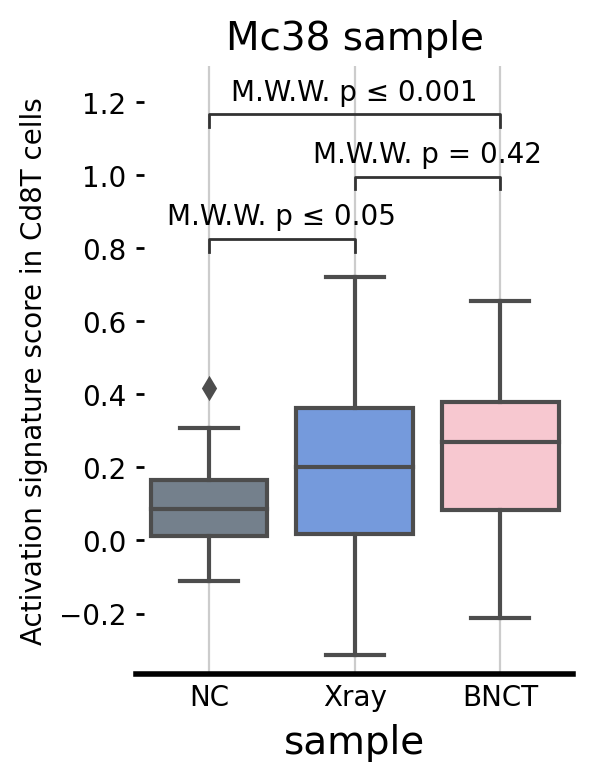

In [99]:
sc.tl.score_genes(T_adata, act_sig, ctrl_size=500, gene_pool=None, n_bins=25, score_name='score', random_state=0, copy=False, use_raw=None)

df = T_adata.obs[["sample","score"]]
x = "sample"
y = "score"
order=['NC','Xray','BNCT']
fig,ax = plt.subplots(figsize=(2.8,4),dpi=100,facecolor="w")

ax = sns.boxplot(data=df, x=x, y=y, order=order,ax=ax,palette=['slategrey', 'cornflowerblue', 'pink'])
plt.grid()
pairs=[("Xray", "NC"), ("BNCT", "NC"),  ("BNCT", "Xray")]
annotator = Annotator(ax, pairs, data=df, x=x, y=y, order=order)
annotator.configure(test='Mann-Whitney', text_format='simple', line_height=0.03,line_width=1,text_offset=3,fontsize=10) # t-test_ind
annotator.apply_and_annotate()

ax.tick_params(which='major',direction='in',length=3,width=1.,labelsize=10,bottom=False)
for spine in ["top","left","right"]:
    ax.spines[spine].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
for text in ax.texts:
    text.set_fontsize(10) 
ax.set_axisbelow(True)
ax.set_ylabel('Activation signature score in Cd8T cells', size=10)
plt.title('Mc38 sample')
plt.show()

NC vs. Xray: Mann-Whitney-Wilcoxon test two-sided, P_val:7.629e-02 U_stat=1.898e+03


/home/zhaoyp/miniconda3/envs/py38/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:175: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[score_name] = pd.Series(


Xray vs. BNCT: Mann-Whitney-Wilcoxon test two-sided, P_val:8.506e-01 U_stat=2.775e+03
NC vs. BNCT: Mann-Whitney-Wilcoxon test two-sided, P_val:3.743e-02 U_stat=2.224e+03


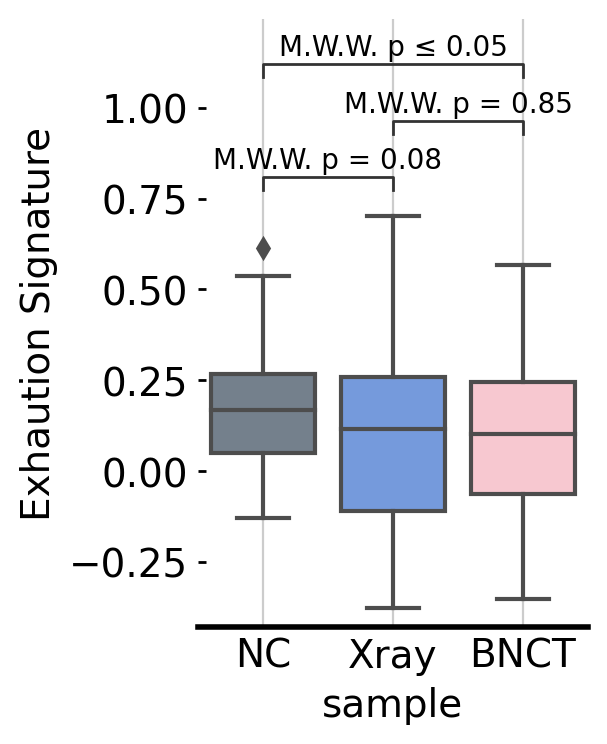

In [100]:
sc.tl.score_genes(T, exh_sig, ctrl_size=500, gene_pool=None, n_bins=25, score_name='score', random_state=0, copy=False, use_raw=None)

df = T.obs[["sample",'score']]
x = "sample"
y = 'score'
order=['NC','Xray','BNCT']
fig,ax = plt.subplots(figsize=(2.5,4),dpi=100,facecolor="w")

ax = sns.boxplot(data=df, x=x, y=y, order=order,ax=ax,palette=['slategrey', 'cornflowerblue', 'pink'])
plt.grid()
pairs=[("NC", "BNCT"), ("NC", "Xray"), ("Xray", "BNCT")]
annotator = Annotator(ax, pairs, data=df, x=x, y=y, order=order)
annotator.configure(test='Mann-Whitney', text_format='simple', line_height=0.03,line_width=1,fontsize=10)
annotator.apply_and_annotate()

ax.tick_params(which='major',direction='in',length=3,width=1.,labelsize=14,bottom=False)
for spine in ["top","left","right"]:
    ax.spines[spine].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
# ax.grid(axis='y',ls='--',c='gray')
ax.set_axisbelow(True)
ax.set_ylabel('Exhaution Signature')
plt.show()
